In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

# 데이터 이해하기

1. 내가 App 개발자라면 어떤 App이 사용자에게 유용할 것인가 또는 어떤 App을 만들어야 Rating을 올릴 수 있을까?
2. 내가 App 사용자라면 어떤 App이 나에게 유용할 것인가 또는 어떤 App에 내가 Rating을 높게 줄 것인가?

위 2가지를 생각하며 분석에 들어가자!

## Google Play Store에 대한 간단한 이해
스마트폰 사용자 중 Android 사용자만이 사용하는 전세계에서 가장 많이 이용하는 스마트폰 앱스토어 이며 다양한 장르의 앱을 무료 또는 유료로 다운받을 수 있다.

## features
- App : 앱의 이름

- Category : 앱이 속한 카테고리

- Reviews : 앱에 대한 사용자의 리뷰 수

- Size : 앱의 크기

- Installs : 앱에 대한 사용자 다운로드 / 설치 수

- Type : 0 - 무료 / 1 - 유료

- Price : 앱 가격 (기준 : 달러)

- Content Rating : 앱이 대상으로하는 연령대 - Children / Mature 21+ / Adult

- Genres : 앱의 기본 카테고리를 제외한 속한 장르

## target
- Rating : 앱 사용자들의 종합 적인 평가의 평균 Rating

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/DataAnalysis/Google Play Store dataset/data/ggstore_train.csv')
test = pd.read_csv('/content/drive/MyDrive/DataAnalysis/Google Play Store dataset/data/ggstore_test.csv')
submission = pd.DataFrame(test['Id'].values, columns=['Id'])

In [ ]:
train.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Id
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,0,0.0,Everyone,Art & Design,2018-01-07,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,0,0.0,Everyone,Art & Design,2018-08-01,2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,0,0.0,Teen,Art & Design,2018-06-08,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,0,0.0,Everyone,Art & Design;Creativity,2018-06-20,4


In [ ]:
test.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Id
0,Dr.Android Repair Master 2017,PRODUCTIVITY,1205,4.3,100000.0,0,0.00,Everyone,Productivity,2018-06-10,5617
1,DR CONTROL,FAMILY,267,1.5,10000.0,0,0.00,Everyone,Entertainment,2017-03-08,5618
2,Dr Driving Racer,GAME,183,68.0,10000.0,0,0.00,Everyone,Racing,2018-06-14,5619
3,Dr. McDougall Mobile Cookbook,HEALTH_AND_FITNESS,76,1.2,1000.0,1,4.99,Everyone,Health & Fitness,2015-01-26,5620
4,Dr. Seuss's ABC,FAMILY,429,12.0,10000.0,1,3.99,Everyone,Books & Reference;Education,2018-02-26,5621


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             5616 non-null   object 
 1   Category        5616 non-null   object 
 2   Rating          5616 non-null   float64
 3   Reviews         5616 non-null   int64  
 4   Size            5616 non-null   float64
 5   Installs        5616 non-null   float64
 6   Type            5616 non-null   int64  
 7   Price           5616 non-null   float64
 8   Content Rating  5616 non-null   object 
 9   Genres          5616 non-null   object 
 10  Last Updated    5616 non-null   object 
 11  Id              5616 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 526.6+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1404 non-null   object 
 1   Category        1404 non-null   object 
 2   Reviews         1404 non-null   int64  
 3   Size            1404 non-null   float64
 4   Installs        1404 non-null   float64
 5   Type            1404 non-null   int64  
 6   Price           1404 non-null   float64
 7   Content Rating  1404 non-null   object 
 8   Genres          1404 non-null   object 
 9   Last Updated    1404 non-null   object 
 10  Id              1404 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 120.8+ KB


In [ ]:
train.describe()

,Rating,Reviews,Size,Installs,Type,Price,Id
count,5616.000000,5.616000e+03,5616.000000,5.616000e+03,5616.000000,5616.000000,5616.000000
mean,4.177386,1.686437e+05,21.831198,5.201445e+06,0.078526,1.409918,2807.500000
std,0.543153,1.126012e+06,22.744877,3.012485e+07,0.269021,20.341193,1621.343887
min,1.000000,1.000000e+00,0.008500,1.000000e+00,0.000000,0.000000,0.000000
25%,4.000000,1.140000e+02,5.100000,1.000000e+04,0.000000,0.000000,1403.750000
50%,4.300000,2.158000e+03,13.000000,1.000000e+05,0.000000,0.000000,2807.500000
75%,4.500000,3.292125e+04,30.000000,1.000000e+06,0.000000,0.000000,4211.250000
max,5.000000,4.489172e+07,100.000000,1.000000e+09,1.000000,400.000000,5615.000000


In [ ]:
test.describe()

,Reviews,Size,Installs,Type,Price,Id
count,1.404000e+03,1404.000000,1.404000e+03,1404.000000,1404.000000,1404.000000
mean,5.000008e+04,21.502735,1.555711e+06,0.069801,0.232272,6318.500000
std,4.066959e+05,22.688011,6.736048e+06,0.254901,1.141627,405.444201
min,1.000000e+00,0.017000,1.000000e+00,0.000000,0.000000,5617.000000
25%,3.500000e+01,4.000000,1.000000e+03,0.000000,0.000000,5967.750000
50%,3.840000e+02,12.000000,5.000000e+04,0.000000,0.000000,6318.500000
75%,7.284250e+03,33.000000,5.000000e+05,0.000000,0.000000,6669.250000
max,1.347963e+07,100.000000,1.000000e+08,1.000000,16.990000,7020.000000


In [ ]:
print("-- Size -- ")
print(f"Train-set : {train.shape}")
print(f"Test-set  : {test.shape}")

-- Size -- 
Train-set : (5616, 12)
Test-set  : (1404, 11)


In [ ]:
# Train-set에만 있는 칼럼은?
train.columns.difference( test.columns )

Index(['Rating'], dtype='object')

현재 간단하게 데이터의 상태를 보면 
1. 결측치는 존재하지 않는다는 것을 확인할 수 있다. (EDA를 통해서 더 알아볼 예정)
2. Reviews, Installs에 이상치로 판단되는 데이터가 보인다. (EDA를 통해서 더 알아볼 예정)
3. 수치형 변수들 간의 스케일링이 어느 정도 필요한 것으로 보인다.(EDA를 통해서 더 알아볼 예정)
4. Last Updated의 경우 날짜 칼럼으로 변겅이 가능하다.
5. Genres의 경우 ' ; '를 기준으로 앱의 기본 카테고리를 제외한 속한 장르가 나뉘어 진다는 것을 알 수 있다.

따라서 우선 

Last Updated의 경우 날짜 칼럼으로 변경을 할 예정이고 

Genres의 경우 속한 장르가 몇개인지를 나타내는 새로운 칼럼을 만들 예정이다.

In [ ]:
# 날짜 전처리
train['Last Updated'] = train['Last Updated'].apply(pd.to_datetime)
test['Last Updated'] = test['Last Updated'].apply(pd.to_datetime)

train['Last Updated year'] = train['Last Updated'].dt.year
train['Last Updated month'] = train['Last Updated'].dt.month
train['Last Updated day'] = train['Last Updated'].dt.day

test['Last Updated year'] = test['Last Updated'].dt.year
test['Last Updated month'] = test['Last Updated'].dt.month
test['Last Updated day'] = test['Last Updated'].dt.day

In [ ]:
# Genres 칼럼의 count를 구하는 함수
def get_Genres_count(x):
  x_li = x.split(';')
  return len(x_li)

train['Genres_count'] = train['Genres'].apply(get_Genres_count)
test['Genres_count'] = test['Genres'].apply(get_Genres_count)

## Target 분포 확인

In [ ]:
np.sort(train['Rating'].unique())

array([1. , 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


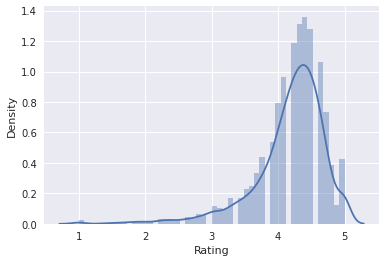

In [ ]:
sns.distplot(train['Rating'])

Rating을 보면 
1. 1~5까지의 값만을 가진다는 것을 확인할 수 있다.
2. 대부분의 값이 4 이상임을 알 수 있다.

개인적으로 데이터를 분석할 때 oof기반의 예측을 많이 하기 때문에 데이터를 어떻게 분리할지에 대한 생각을 많이 하는 편이다.

따라서 
1. 최종 데이터 예측 값의 범위를 1~5로 설정해줄 필요가 있다.
2. 현재 target이 매우 불균형한 상태라고 생각하여 0.5씩을 기준으로 범주화를 시켜서 데이터를 조금 더 Stratify하게 나눌수 있도록할 예정이다.

In [ ]:
# Stratify하게 데이터를 나누기 위해서
train['cat_Rating'] = train['Rating'] // 0.5

## Train과 Test의 차이 확인

In [ ]:
# 각 칼럼별 고유한 데이터의 값과 개수를 나타내는 함수
def getUniqueData(train, test, col):
  unique_data_train = set(train[col].unique())
  unique_count_train = train[col].nunique()

  unique_data_test = set(test[col].unique())
  unique_count_test = test[col].nunique()
  print('='* 100)
  
  print(f'{col}의 고유한 Train data의 개수는: {unique_count_train}')
  print(f'{col}의 고유한 Test data의 개수는: {unique_count_test}')
  if unique_count_train >= 50: print(f'{col}의 고유한 Train 데이터의 개수가 50개를 넘어 시각화하지 않습니다.')
  else: print(f'{col}의 고유한 Train 데이터는: {sorted(unique_data_train)}')
  if unique_count_test >= 50: print(f'{col}의 고유한 Test 데이터의 개수가 50개를 넘어 시각화하지 않습니다.')
  else: print(f'{col}의 고유한 Test 데이터는: {sorted(unique_data_test)}')
  
  print()

  only_train_data = unique_data_train.difference(unique_data_test)
  print(f"{col}의 Train-set에만 있는 데이터는 총 { len(only_train_data) }개 입니다.")
  if len(only_train_data) >= 50: print(f'{col}의 Train-set에만 있는 데이터의 개수가 50개를 넘어 시각화하지 않습니다.')
  else: print(f"{col}의 Train-set에만 있는 데이터는 : { sorted(only_train_data) }")

  only_test_data = unique_data_test.difference(unique_data_train)
  print(f"{col}의 Test-set에만 있는 데이터는 총 { len(only_test_data) }개 입니다.")
  if len(only_test_data) >= 50: print(f'{col}의 Test-set에만 있는 데이터의 개수가 50개를 넘어 시각화하지 않습니다.')
  else: print(f"{col}의 Test-set에만 있는 데이터는 : { sorted(only_test_data) }")

  print('='* 100)

In [ ]:
cols = test.columns
for col in cols:
  getUniqueData(train, test, col)

App의 고유한 Train data의 개수는: 5616
App의 고유한 Test data의 개수는: 1404
App의 고유한 Train 데이터의 개수가 50개를 넘어 시각화하지 않습니다.
App의 고유한 Test 데이터의 개수가 50개를 넘어 시각화하지 않습니다.

App의 Train-set에만 있는 데이터는 총 5616개 입니다.
App의 Train-set에만 있는 데이터의 개수가 50개를 넘어 시각화하지 않습니다.
App의 Test-set에만 있는 데이터는 총 1404개 입니다.
App의 Test-set에만 있는 데이터의 개수가 50개를 넘어 시각화하지 않습니다.
Category의 고유한 Train data의 개수는: 33
Category의 고유한 Test data의 개수는: 31
Category의 고유한 Train 데이터는: ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']
Category의 고유한 Test 데이터는: ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENC

주의 깊게 볼 요소는 App과 Genres 이다.

App의 경우 모든 App의 제목이 다르 다는 것을 알 수 있고 Id와 유사한 칼럼임을 알 수 있다.

Genres의 경우 Test 데이터에만 존재하는 값이 있다는 것을 알 수 있다.

나머지 칼럼의 경우 Test 데이터에 존재하는 값이 Train 데이터에 존재한다는 것을 알 수 있으며 

Category column의 경우 Train과 Test 데이터를 합쳐 LabelEncoder 또는 OneHotEncoder를 진행해야 할 것 이다.

## BaseLine Model

개인적으로 본격적인 분석을 시행하기 전에 BaseLine Model을 만들어 데이터를 분석의 방향을 어느정도 잡고 모델 성능 평가의 기준을 정한 후 분석을 진행하는 편이다.

이번 대회의 경우 하루 제출 횟수가 10번이라 총 10번의 초기 실험을 진행하였다.

크게 LabelEncoder와 OneHotEncoder의 차이, target 데이터를 Stratify하게 나누었을 때와 그렇지 않았을 때의 차이이다.

코드가 매우 지저분해서 따로 이 노트북에는 나타내지 않았지만

OneHotEncoder의 경우 선형기반의 모델의 성능이 압도적으로 향상시키는 경향을 보이지만 Category column을 OneHotEncoding 할 결우 픽쳐의 개수가 매우 많아지기 때문에 Train 데이터에 과적합되는 경향을 보이며 일반화가 실패하여 Test 데이터에 대한 모델 성능이 하락하는 모습을 보였다.

Stratify하게 데이터를 나누지 않았을 때가 성능은 조금 더 좋았지만 이 또한 일반화가 제대로 되지 않아 Test 데이터에 대한 모델 성능이 하락하는 모습을 보였다.

결과적으로 ensemble 모델과 데이터를 Stratify하게 나누었을 때 성능이 더 우세한 모델이 된다는 것을 알 수 있었다.

따라서 앞으로 

원핫인코딩을 통한 선형모델 사용 보다는

라벨인코딩을 통한 트리기반의 앙상블 모델의 성능이 더 좋다는 것을 알아냈기 때문에

앞으로 라벨인코딩과 앙상블 모델을 활용한 모델 성능 향상이 주가 될 것이며

또한 데이터를 나눌때 stratify하게 나누는 것이 더 일반화된 모델을 만들기 때문에 데이터를 stratify하게 나눌 것이다.

In [ ]:
# 평가지표인 rmse 함수 생성
def rmse(y_pred, y_true):
  # 예측값의 기준을 1 ~ 5로 설정함
  y_pred = np.clip(y_pred, a_min = 1, a_max = 5)
  return np.sqrt(np.mean((y_true-y_pred)**2))

In [ ]:
# LabelEncoder

from sklearn.preprocessing import LabelEncoder
# 속도 체크
from tqdm import tqdm_notebook

# 원본데이터의 변형을 막고자 데이터를 copy함
temp_train = train.copy()
temp_test = test.copy()

lbl = LabelEncoder()

# Implement Label Encoding 
cat_cols =  ['Category', 'Content Rating', 'Genres']
for col in tqdm_notebook( cat_cols ):
    # local_train과 local_test를 concat하여 temp_df에 저장
    temp_df = pd.concat([ temp_train[[col]], temp_test[[col]] ] , axis=0)
    
    # Label-Encoding을 fitting함
    lbl.fit( temp_df[col] )
    
    # local_train/local_test에 label_encoding한 값을 대입함
    temp_train[col] = lbl.transform(temp_train[col])
    temp_test[col] = lbl.transform(temp_test[col])

target = 'Rating'
features = ['Category', 'Reviews', 'Size', 'Installs', 'Content Rating', 'Genres', 'Last Updated year', 'Genres_count']

X_train = temp_train[features]
y_train = temp_train[target]

X_test = temp_test[features]

개인적으로 중요하다고 생각한 변수인 ['Category', 'Reviews', 'Size', 'Installs', 'Content Rating', 'Genres', 'Last Updated year', 'Genres_count'] 를 가지고 분석을 진행했다.

In [ ]:
# OneHotEncoder

# from sklearn.preprocessing import OneHotEncoder

# cat_cols =  ['Category', 'Content Rating', 'Genres', 'big Genres', 'Last Updated year']
# temp_all = pd.concat([ train[cat_cols], test[cat_cols] ] , axis=0)

# ohe = OneHotEncoder(sparse=False)
# ohe.fit(temp_all[cat_cols])

# ohe_columns = list()
# for lst in ohe.categories_:
#     ohe_columns += lst.tolist()

# new_train_cat = pd.DataFrame(ohe.transform(train[cat_cols]), columns=ohe_columns)
# new_test_cat  = pd.DataFrame(ohe.transform(test[cat_cols]), columns=ohe_columns)

# features = ['Size', 'Installs_log','Reviews_log']
# target = 'Rating'

# temp_train = train[features]
# temp_test = test[features]

# X_train = pd.concat([temp_train, new_train_cat], axis=1)
# y_train = train[target]

# X_test = pd.concat([temp_test, new_test_cat], axis=1)

In [ ]:
X_train.head()

,Category,Reviews,Size,Installs,Content Rating,Genres,Last Updated year,Genres_count
0,0,159,19.0,10000.0,1,9,2018,1
1,0,967,14.0,500000.0,1,11,2018,2
2,0,87510,8.7,5000000.0,1,9,2018,1
3,0,215644,25.0,50000000.0,4,9,2018,1
4,0,967,2.8,100000.0,1,10,2018,2


In [ ]:
# 데이터 분할
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# 모델
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# 속도 체크
from tqdm import tqdm_notebook

# CV는 5로
n_split = 5

# 균등하게 니눌때 사용
skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22)
# 균등하지 나누지 않을 때 사용
kf = KFold(n_splits = n_split, shuffle=True, random_state=22)

# train 데이터에 대한 예측 값이 저장될 배열
rf_oof_train = np.zeros(y_train.shape)
lgbm_oof_train = np.zeros(y_train.shape)
xgb_oof_train = np.zeros(y_train.shape)
lr_oof_train = np.zeros(y_train.shape)
lasso_oof_train = np.zeros(y_train.shape)
ridge_oof_train = np.zeros(y_train.shape)

# test 데이터에 대한 예측 값이 저장될 배열
rf_oof_test = np.zeros((X_test.shape[0], ))
lgbm_oof_test = np.zeros((X_test.shape[0], ))
xgb_oof_test = np.zeros((X_test.shape[0], ))
lr_oof_test = np.zeros((X_test.shape[0], ))
lasso_oof_test = np.zeros((X_test.shape[0], ))
ridge_oof_test = np.zeros((X_test.shape[0], ))

rf = RandomForestRegressor(random_state=22)
lgbm = lgbm.LGBMRegressor(random_state=22, tree_method='gpu_hist', predictor='gpu_predictor')
xgb = xgb.XGBRegressor(random_state=22, tree_method='gpu_hist', predictor='gpu_predictor', objective = 'reg:squarederror')
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()

# oof 방식을 통한 예측
for trn_idx, val_idx in tqdm_notebook(skf.split(X_train, train['cat_Rating'])):
  trn_data, trn_label = X_train.iloc[trn_idx], y_train.iloc[trn_idx]
  val_data, val_label = X_train.iloc[val_idx], y_train.iloc[val_idx]

  # RandomForestRegressor
  rf.fit(trn_data, trn_label)
  rf_valid_pred = rf.predict(val_data)
  rf_oof_train[val_idx] = rf_valid_pred

  rf_test_pred = rf.predict(X_test)
  rf_oof_test += rf_test_pred / n_split

  # LGBMRegressor
  lgbm.fit(trn_data, trn_label)
  lgbm_valid_pred = lgbm.predict(val_data)
  lgbm_oof_train[val_idx] = lgbm_valid_pred

  lgbm_test_pred = lgbm.predict(X_test)
  lgbm_oof_test += lgbm_test_pred / n_split

  # XGBRegressor
  xgb.fit(trn_data, trn_label)
  xgb_valid_pred = xgb.predict(val_data)
  xgb_oof_train[val_idx] = xgb_valid_pred

  xgb_test_pred = xgb.predict(X_test)
  xgb_oof_test += xgb_test_pred / n_split

  # LinearRegression
  lr.fit(trn_data, trn_label)
  lr_valid_pred = lr.predict(val_data)
  lr_oof_train[val_idx] = lr_valid_pred

  lr_test_pred = lr.predict(X_test)
  lr_oof_test += lr_test_pred / n_split

  # Lasso
  lasso.fit(trn_data, trn_label)
  lasso_valid_pred = lasso.predict(val_data)
  lasso_oof_train[val_idx] = lasso_valid_pred

  lasso_test_pred = lasso.predict(X_test)
  lasso_oof_test += lasso_test_pred / n_split

  # Ridge
  ridge.fit(trn_data, trn_label)
  ridge_valid_pred = ridge.predict(val_data)
  ridge_oof_train[val_idx] = ridge_valid_pred

  ridge_test_pred = ridge.predict(X_test)
  ridge_oof_test += ridge_test_pred / n_split

In [ ]:
print("RandomForestRegressor :{} ".format( rmse(rf_oof_train, y_train) ))
print("LGBMRegressor         :{} ".format( rmse(lgbm_oof_train, y_train) ))
print("XGBRegressor          :{} ".format( rmse(xgb_oof_train, y_train) ))
print("LinearRegression      :{} ".format( rmse(lr_oof_train, y_train) ))
print("Lasso                 :{} ".format( rmse(lasso_oof_train, y_train) ))
print("Ridge                 :{} ".format( rmse(ridge_oof_train, y_train) ))

RandomForestRegressor :0.521362341548655 
LGBMRegressor         :0.5076668764954844 
XGBRegressor          :0.5063201569313969 
LinearRegression      :0.5369831379842762 
Lasso                 :0.5416696346990609 
Ridge                 :0.5369828838416785 


In [ ]:
submission['Rating'] = np.clip(xgb_oof_test, a_min = 1, a_max = 5)
submission.to_csv('baseline_xgb.csv', index=False)
submission.head()

,Id,Rating
0,5617,4.080335
1,5618,3.989250
2,5619,4.021203
3,5620,4.052260
4,5621,4.250477


가장 성능이 좋았던 XGBRegressor의 경우

test 데이터의 RMSE가 0.58479가 나옴

LGBMRegressor의 경우 feature의 조합에 따라서 XGBRegressor보다 더 우세한 성능을 보이지만 test 데이터에 대한 예측 성능은 매우 떨어지는 경향을 보이는데 

이 이유는 아마 LGBMRegressor의 경우 데이터의 수가 적으면 과적합이 일어나기 때문안 것으로 판단된다.

따라서 앞으로 주 모델은 XGBRegressor이 될 것임

[Text(0.5, 1.0, 'Coef of Ridge')]

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


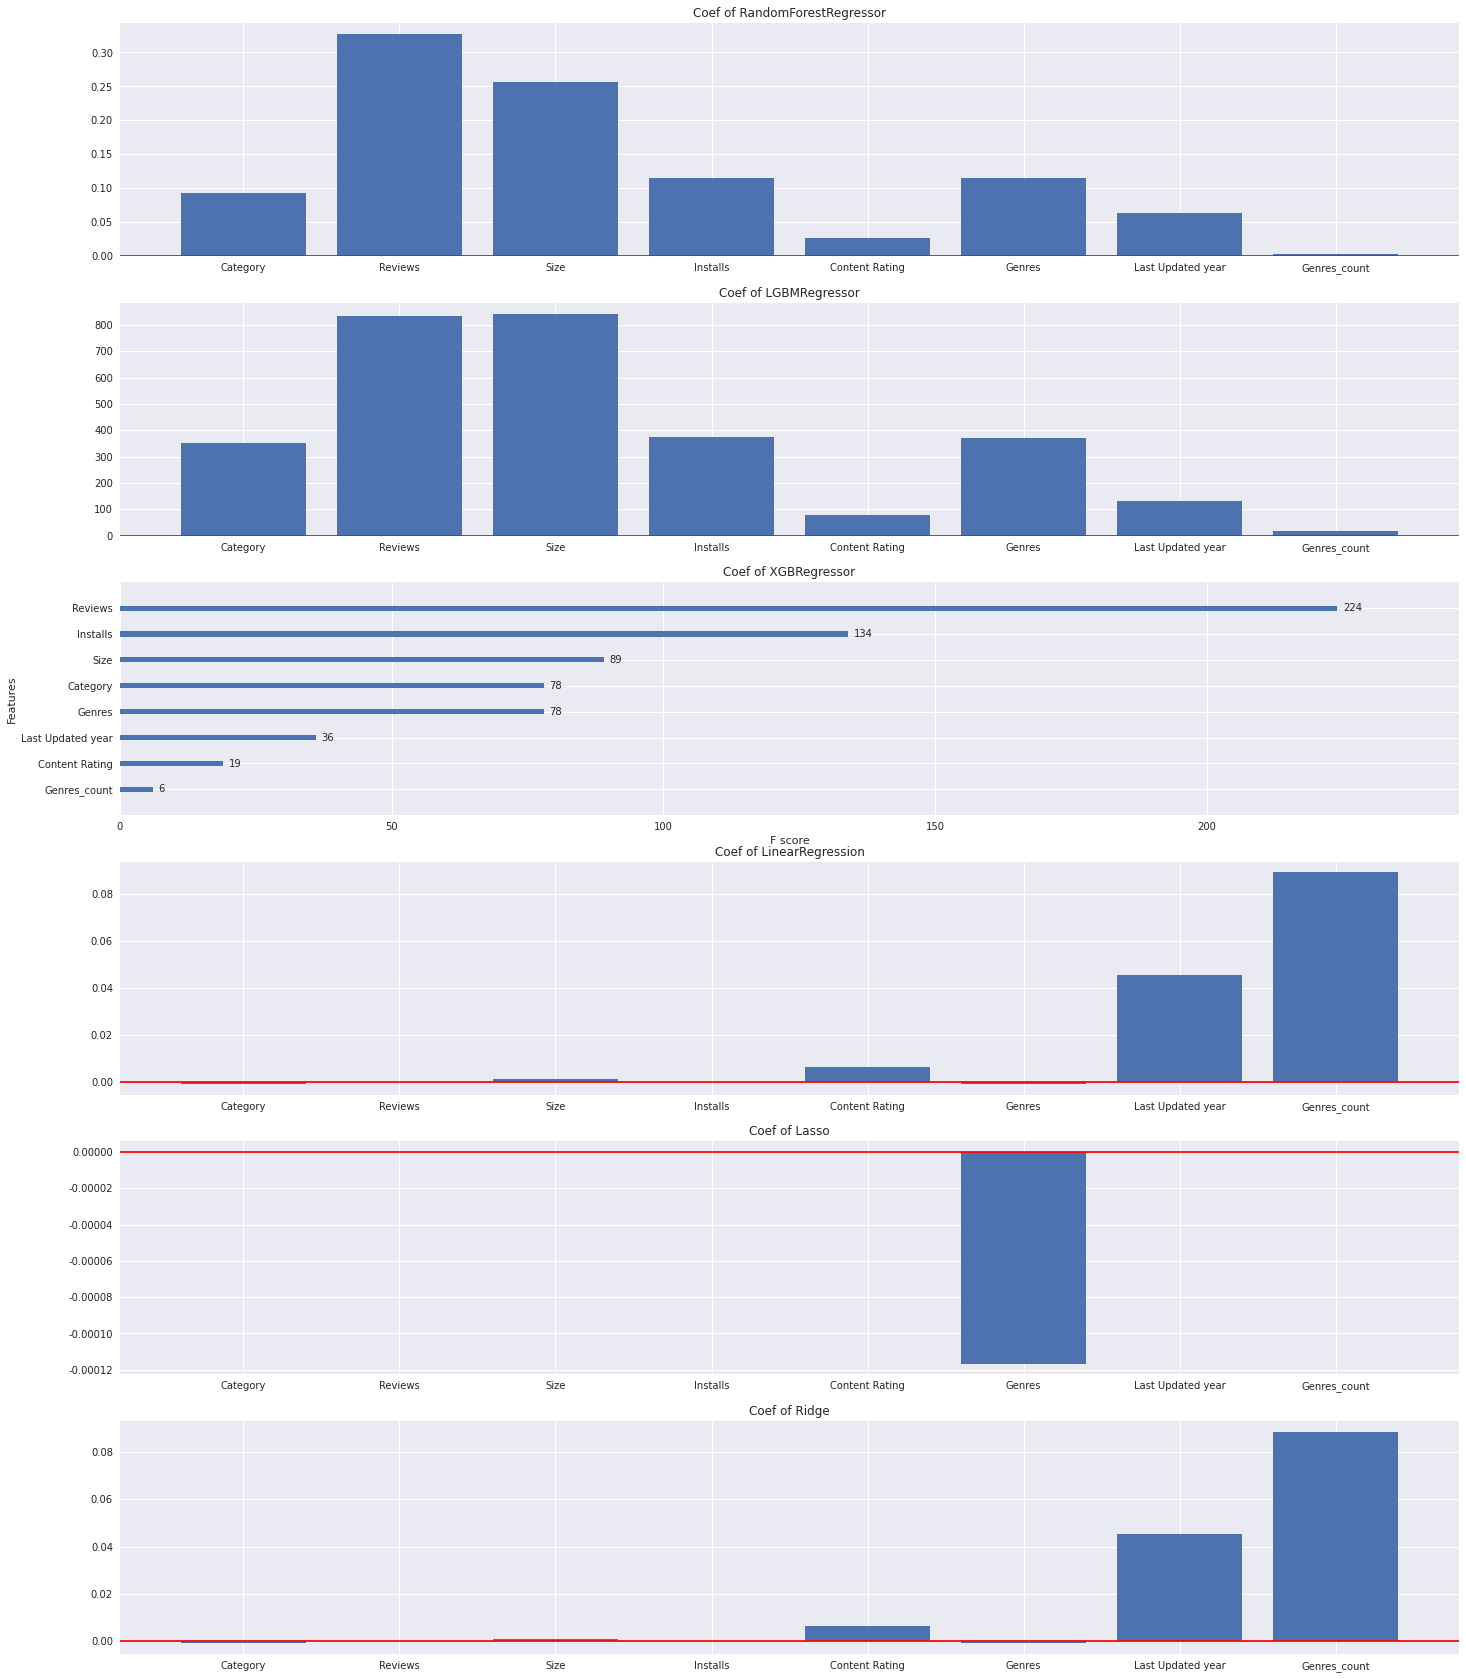

In [ ]:
# xgboost의 경우 feature_importances_의 기준이 다른 모델들과 다르기 때문에 plot_importance를 통하여 feature_importances_를 시각화 해야함
from xgboost import plot_importance

figure, ax = plt.subplots(nrows=6, ncols=1)
figure.set_size_inches(24,30)

# RandomForestRegressor
ax[0].bar( X_train.columns, rf.feature_importances_)
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set(title="Coef of RandomForestRegressor")

# LGBMRegressor
ax[1].bar( X_train.columns,  lgbm.feature_importances_ )
ax[1].axhline(y=0, color='r', linestyle='-')
ax[1].set(title="Coef of LGBMRegressor")

# XGBRegressor
plot_importance(xgb, ax = ax[2])
ax[2].set(title="Coef of XGBRegressor")

# LinearRegression
ax[3].bar( X_train.columns, lr.coef_)
ax[3].axhline(y=0, color='r', linestyle='-')
ax[3].set(title="Coef of LinearRegression")

# Lasso
ax[4].bar( X_train.columns, lasso.coef_)
ax[4].axhline(y=0, color='r', linestyle='-')
ax[4].set(title="Coef of Lasso")

# Ridge
ax[5].bar( X_train.columns, ridge.coef_)
ax[5].axhline(y=0, color='r', linestyle='-')
ax[5].set(title="Coef of Ridge")

현재 까지 결과로는 cv를 통한 모델 학습이 가장 성능이 좋다는 것을 알아냈다.

# EDA + feature engineering

머신러닝 모댈의 성능 향상은 대부분 누가 더 feature를 잘 만드냐의 싸움이기 때문에 Category column이 존재하는 경우 문자열을 잘 다루는 것이 중요하며 Numeric column의 경우 조합을 통한 새로운 column을 만드는 것이 중요할 것이고 이것이 앞으로 EDA의 핵심이 될 것이다.

In [ ]:
# 데이터 시각화를 위한 함수를 만듬
def get_barplot(cols, target, data, title , hue = None):
    plt.figure(figsize=(12,8))
    sns.barplot(x=cols, y=target, data = data, hue = hue)
    plt.title(title)

def get_pointplot(cols, target, data, title , hue = None):
    plt.figure(figsize=(12,8))
    sns.pointplot(x=cols, y=target, data = data, hue = hue)
    plt.title(title)

def get_boxplot(cols, target, data, title , hue = None):
    plt.figure(figsize=(12,8))
    sns.boxplot(x=cols, y=target, data = data, hue = hue)
    plt.title(title)

def get_countplot(cols, df, title, hue = None):
  plt.figure(figsize=(12,8))
  sns.countplot(y = cols, data = df, order = df[cols].value_counts().index)
  plt.title(title)

## 범주형 변수

### App

App의 이름에 많은 정보가 존재할 것이다.

과거 스팸 문자 데이터를 전처리 했었던 적이 있다. 

1. 스팸문자의 경우 길이가 짧을 수록 스팸 문자일 확률이 높았었는데 App이름 또한 길이와 연관이 있을 것 같다고 생각하여 App의 길이를 나타내는 새로운 feature을 만들었다.

2. 스팸 문자의 경우 빈도수가 높은 특정 단어의 경우 스팸 문자일 확률이 높았었는데 App 또한 빈도수가 높은 특정 단어의 경우 rating이 높아질 수도 있다고 생각하여 CountVectorizer를 통하여 빈도수가 50개 이상인 단어를 새로운 feature로 만들었다. 

In [ ]:
train['App_len'] = train['App'].apply(lambda x : len(x))
test['App_len'] = test['App'].apply(lambda x : len(x))

Text(0.5, 1.0, 'Rating  VS App_len')

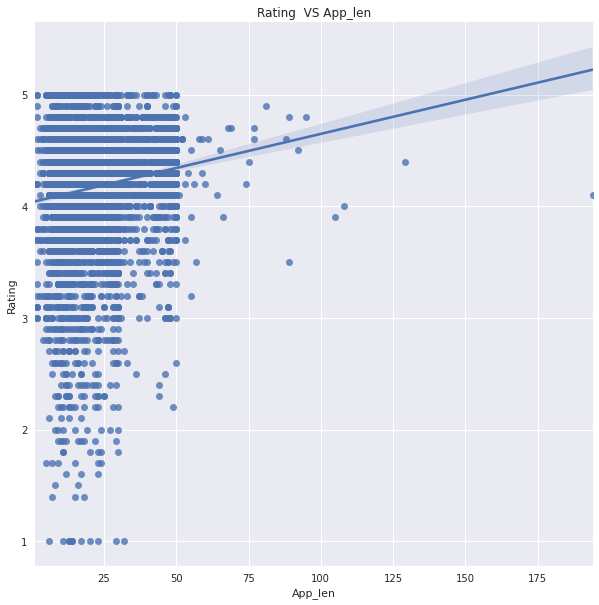

In [ ]:
plt.figure(figsize = (10,10))
sns.regplot(x="App_len", y="Rating",data = train)
plt.title('Rating  VS App_len')

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
'''
순서
1. 뛰어 쓰기가 여러번 된 문자가 있어서 모든 뛰어쓰기를 1개로 통일시켜줬다.
2. 그 후 문자를 한글, 영어를 제외한 다른 문자들을 제거해주었다.
3. 모든 문자를 소문자로 변회시켰다.
4. 각 단어 별 50개 이상의 빈도수를 나타내는 단어만 따로 TDM을 만들었다.
5. 불용어 처리를 해주었다.
6. 중복되는 의미를 가진 단어를 하나의 단어로 합쳐주었다.
'''

import re
def get_Clean_App(x):
  x_li = x.split(' ')
  new_x_li = []
  for i in x_li:
    i = i.replace(" ","")
    new_x_li.append(i)
  return re.sub('[^ A-Za-z가-힣]', '', " ".join(new_x_li))


train['Clean_App'] = train['App'].apply(get_Clean_App)
train['Clean_App'] = train['Clean_App'].apply(lambda x : x.lower())

test['Clean_App'] = test['App'].apply(get_Clean_App)
test['Clean_App'] = test['Clean_App'].apply(lambda x : x.lower())

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(min_df=50)

count_vector.fit(pd.concat([train['Clean_App'], test['Clean_App']]))

train_doc = count_vector.transform(train['Clean_App']).toarray()
test_doc = count_vector.transform(test['Clean_App']).toarray()

train_doc = pd.DataFrame(train_doc, columns = count_vector.get_feature_names())
test_doc = pd.DataFrame(test_doc, columns = count_vector.get_feature_names())

stopwords = nltk.corpus.stopwords.words('english')
words_cols = [col for col in train_doc.columns if col not in stopwords]

train_doc = train_doc[words_cols]
test_doc = test_doc[words_cols]

train_doc['game'] = train_doc['game'] + train_doc['games']
test_doc['game'] = test_doc['game'] + test_doc['games']

train_doc = train_doc.drop(labels = ['games'], axis=1)
test_doc = test_doc.drop(labels = ['games'], axis=1)

train = pd.concat([train, train_doc], axis=1)
test = pd.concat([test, test_doc], axis=1)

### Category

유사한 Category는 묶을 수 있지 않을까 생각했지만 유사해보이는 Category는 따로 존재하지 않아 보이므로 따로 변형을 시켜주지는 않았다.

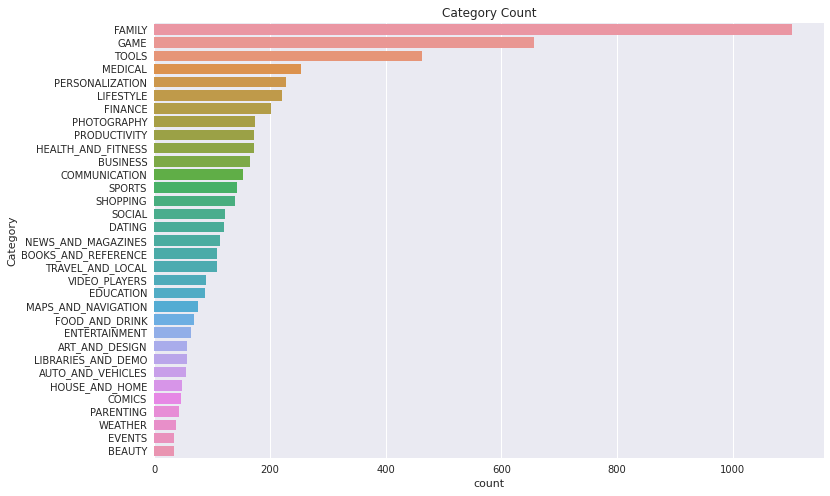

In [ ]:
get_countplot('Category', train, 'Category Count')

In [ ]:
train['Category'].value_counts()

FAMILY                 1102
GAME                    657
TOOLS                   463
MEDICAL                 253
PERSONALIZATION         227
LIFESTYLE               220
FINANCE                 201
PHOTOGRAPHY             175
PRODUCTIVITY            173
HEALTH_AND_FITNESS      172
BUSINESS                166
COMMUNICATION           153
SPORTS                  143
SHOPPING                139
SOCIAL                  122
DATING                  121
NEWS_AND_MAGAZINES      114
BOOKS_AND_REFERENCE     109
TRAVEL_AND_LOCAL        108
VIDEO_PLAYERS            90
EDUCATION                88
MAPS_AND_NAVIGATION      76
FOOD_AND_DRINK           69
ENTERTAINMENT            64
ART_AND_DESIGN           57
LIBRARIES_AND_DEMO       57
AUTO_AND_VEHICLES        55
HOUSE_AND_HOME           48
COMICS                   46
PARENTING                43
WEATHER                  37
EVENTS                   34
BEAUTY                   34
Name: Category, dtype: int64

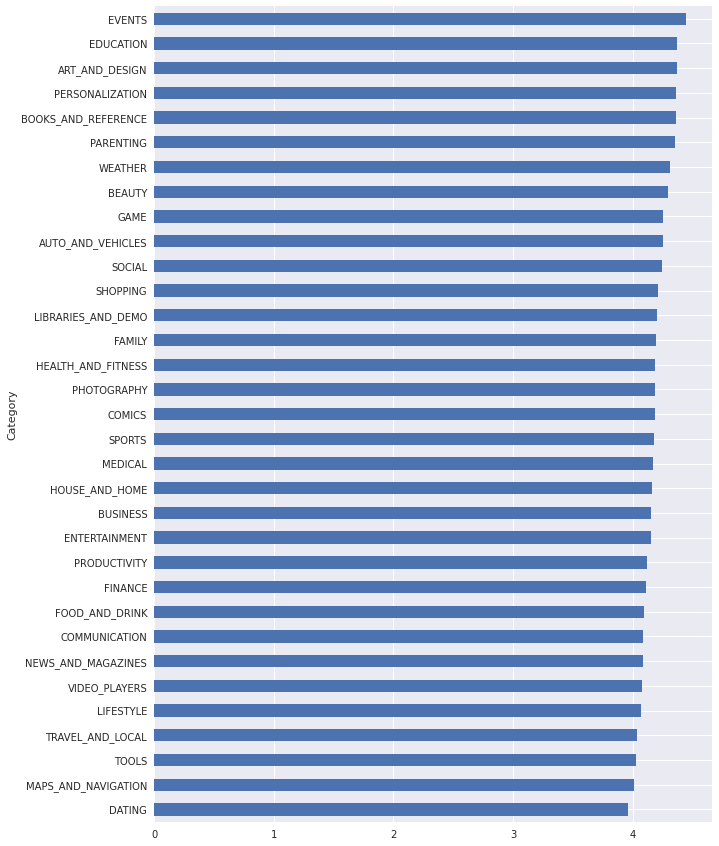

In [ ]:
plt.figure(figsize=(10,15))
train.groupby('Category').mean()['Rating'].sort_values().plot.barh()

### Content Rating

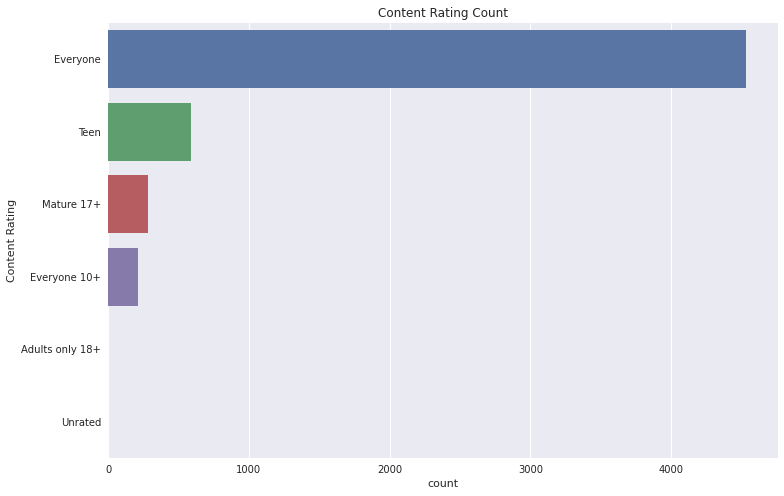

In [ ]:
get_countplot('Content Rating', train, 'Content Rating Count')

In [ ]:
train['Content Rating'].value_counts()

Everyone           4531
Teen                589
Mature 17+          281
Everyone 10+        212
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

2개 1개 등의 아주 작은 값이 존재하여 모델이 의미 없는 값에 집중할 수도 있다고 판단하여

Everyone,
Teen,
Mature 17+,
Everyone 10+,

을 제외한 나머지 Content Rating을 others를 묶어주었다.

In [ ]:
CR_li = train['Content Rating'].value_counts()[train['Content Rating'].value_counts() > 3].index.tolist()

def get_new_CR(x):
  if x in CR_li: return x
  else: return 'others'

train['New Content Rating'] = train['Content Rating'].apply(get_new_CR)
test['New Content Rating'] = test['Content Rating'].apply(get_new_CR)

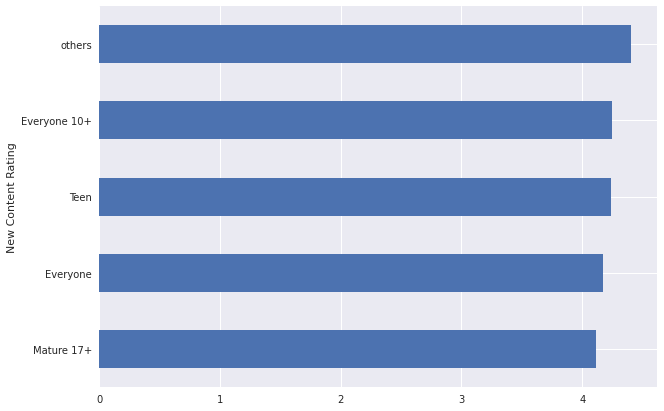

In [ ]:
plt.figure(figsize=(10,7))
train.groupby('New Content Rating').mean()['Rating'].sort_values().plot.barh()

### Genres

2가지 장르에 속한다면 ;를 기준으로 묶여있다는 것을 확인할 수 있다. 

인기있는 장르는  Rating 또한 높을 수도 있다고 생각하여 모든 Genres를 사용하기 위하여 Genres를 원핫인코딩한 새로운 칼럼을 만들었다.



In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
train['Genres'].value_counts()

Tools                                    463
Entertainment                            337
Education                                309
Medical                                  253
Personalization                          227
Lifestyle                                219
Action                                   214
Finance                                  201
Photography                              175
Productivity                             173
Health & Fitness                         172
Business                                 166
Communication                            153
Sports                                   149
Shopping                                 139
Arcade                                   129
Social                                   122
Dating                                   121
News & Magazines                         114
Simulation                               110
Books & Reference                        109
Travel & Local                           107
Video Play

In [ ]:
'''
순서
1. Genres에 속한 모든 Genres를 구한다.
2. 모든 Genres를 컬럼으로 한다.
3. 각 Genres에 대하여 원핫인코딩을 진행한다.
'''

Genres_list = []
for x in train['Genres'].unique():
  x_li = x.split(';')
  for i in x_li:
    if i in Genres_list: pass
    else: Genres_list.append(i)

for x in test['Genres'].unique():
  x_li = x.split(';')
  for i in x_li:
    if i in Genres_list: pass
    else: Genres_list.append(i)

new_df = pd.DataFrame(data=np.zeros((train.shape[0], len(Genres_list))) , columns = Genres_list)
for idx, i in enumerate(train['Genres'].values):
  x_li = i.split(';')
  for x in x_li:
    new_df.loc[idx , [x]] = 1

train = pd.concat([train, new_df], axis=1)

new_df = pd.DataFrame(data=np.zeros((test.shape[0], len(Genres_list))) , columns = Genres_list)
for idx, i in enumerate(test['Genres'].values):
  x_li = i.split(';')
  for x in x_li:
    new_df.loc[idx , [x]] = 1
    
test = pd.concat([test, new_df], axis=1)

### Last Updated

업데이트가 많이 되지 않느다면 Rating이 감소할 수도 있을 것이다라고 생각하여 년월일 등의 변수를 활용하는 것 보다는 가장 최근 업데이트 일에서 각각의 업데이트 일을 뺀 값을 활용하는 것이 Last Updated라는 변수를 더 잘 표현할 수 있다고 생각하여 Last Updated를 수치화시킨 Last Updated Numeric 변수를 새롭게 만들었다.

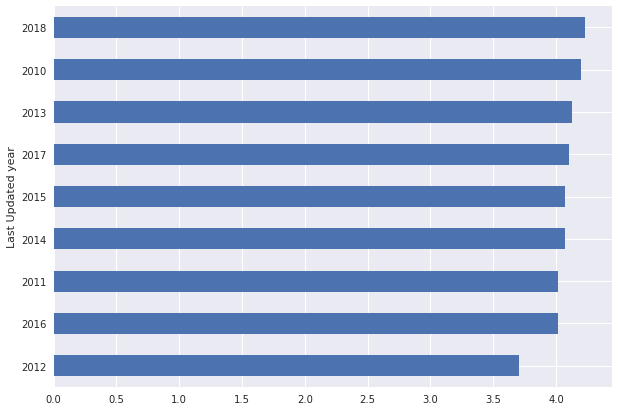

In [ ]:
plt.figure(figsize=(10,7))
train.groupby('Last Updated year').mean()['Rating'].sort_values().plot.barh()

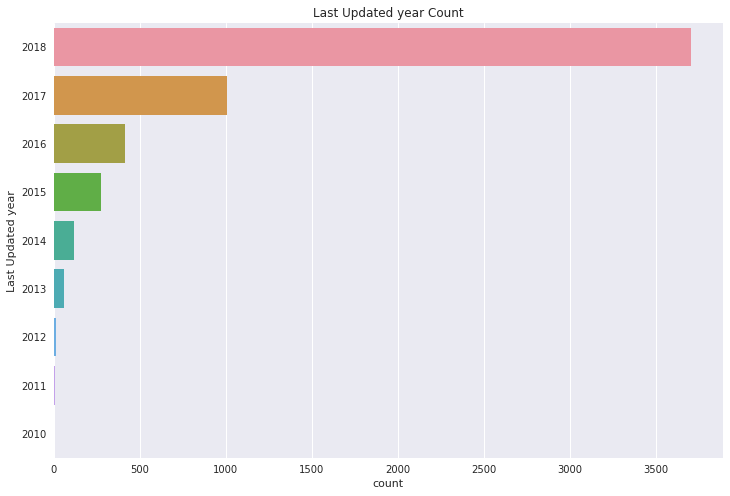

In [ ]:
get_countplot('Last Updated year', train, 'Last Updated year Count')

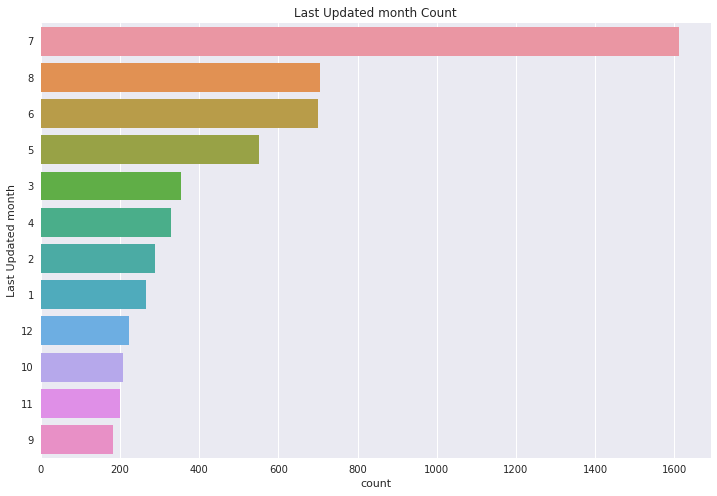

In [ ]:
get_countplot('Last Updated month', train, 'Last Updated month Count')

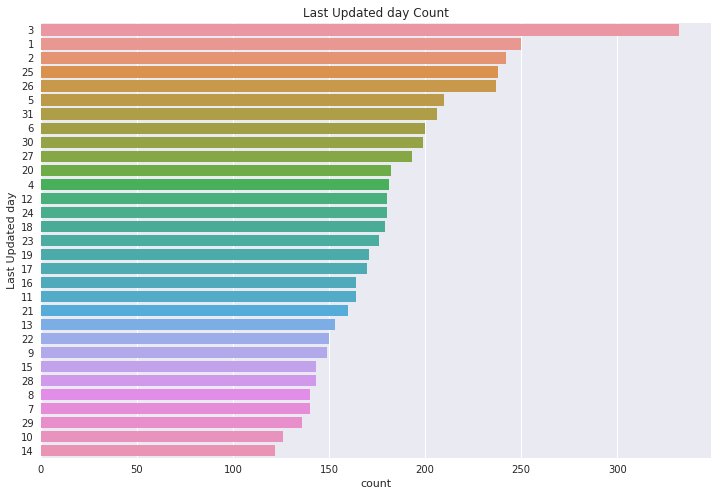

In [ ]:
get_countplot('Last Updated day', train, 'Last Updated day Count')

In [ ]:
train['Last Updated Numeric'] = (train['Last Updated'] - train['Last Updated'].max()).dt.days
test['Last Updated Numeric'] = (test['Last Updated'] - train['Last Updated'].max()).dt.days

Text(0.5, 1.0, 'Rating  VS Last Updated Numeric')

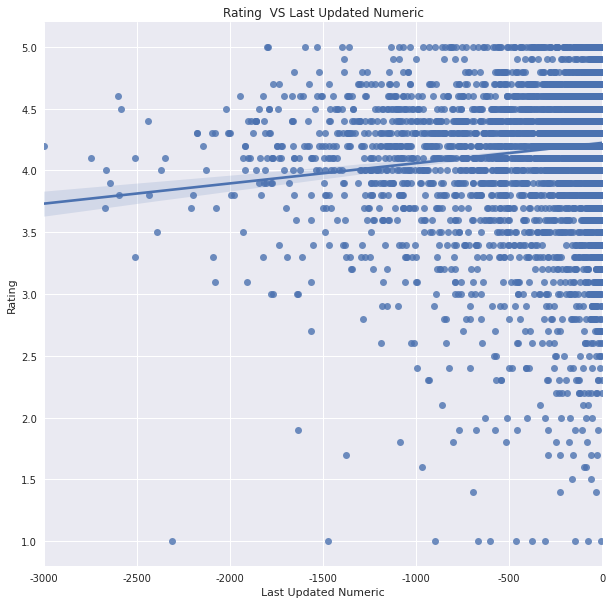

In [ ]:
plt.figure(figsize = (10,10))
sns.regplot(x="Last Updated Numeric", y="Rating",data = train)
plt.title('Rating  VS Last Updated Numeric')

확실히 최근 업데이트가 과거 일수록 Rating이 감소한다는 것을 알 수 있다

### Type (Price의 원핫인코딩이라 할 수 있음)

Type 자체는 무료, 유료 타입을 나타내는 변수이기 때문에 Price 칼럼이 더 가격과 관련된 특성을 잘 표현할 수 있다고 생각하여 사용하지 않을 것이다. 

Text(0.5, 1.0, 'Rating  VS Type')

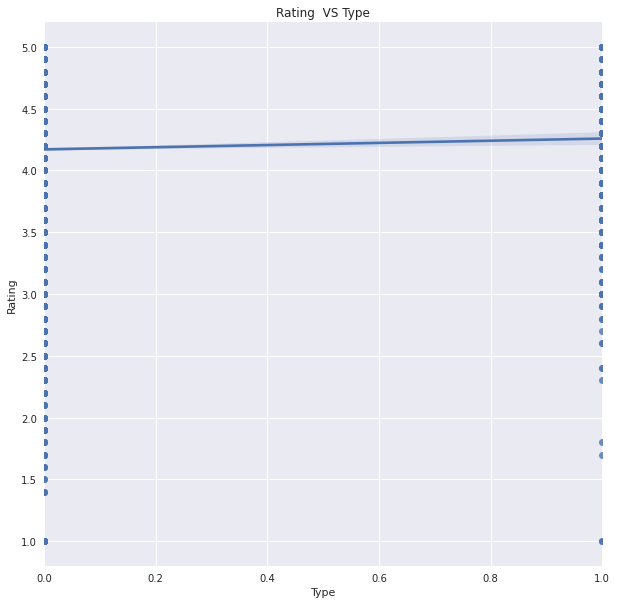

In [ ]:
plt.figure(figsize = (10,10))
sns.regplot(x="Type", y="Rating",data = train)
plt.title('Rating  VS Type')

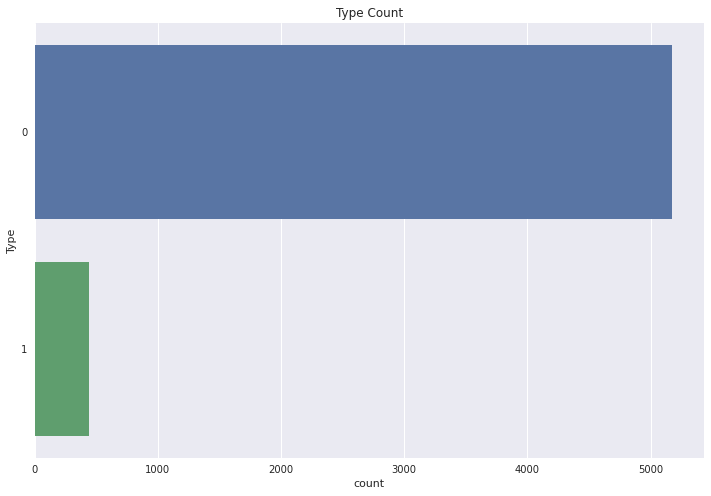

In [ ]:
get_countplot('Type', train, 'Type Count')

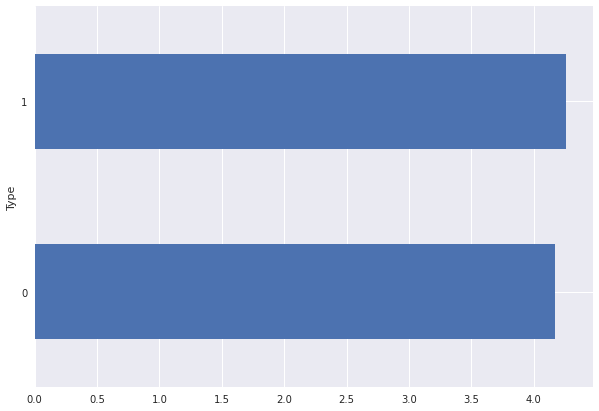

In [ ]:
plt.figure(figsize=(10,7))
train.groupby('Type').mean()['Rating'].sort_values().plot.barh()

In [ ]:
train['Type'].value_counts()

0    5175
1     441
Name: Type, dtype: int64

In [ ]:
(train['Price'] == 0).sum()

5175

## 수치형 변수

[Text(0.5, 1.0, 'distplot of Price')]

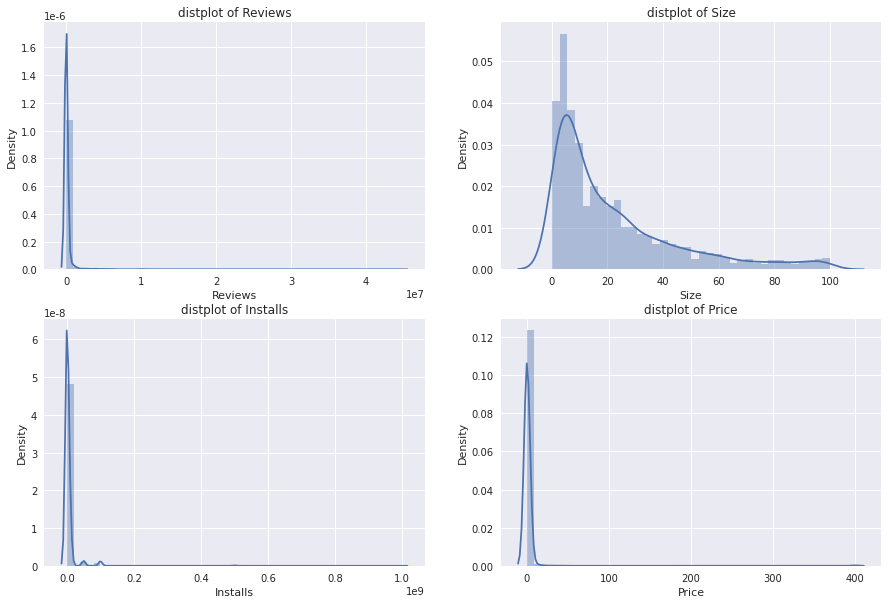

In [ ]:
figure, ax = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15,10)

sns.distplot(train['Reviews'], ax=ax[0][0])
ax[0][0].set(title="distplot of Reviews")

sns.distplot(train['Size'], ax=ax[0][1])
ax[0][1].set(title="distplot of Size")

sns.distplot(train['Installs'], ax=ax[1][0])
ax[1][0].set(title="distplot of Installs")

sns.distplot(train['Price'], ax=ax[1][1])
ax[1][1].set(title="distplot of Price")

[Text(0.5, 1.0, 'boxplot of Price')]

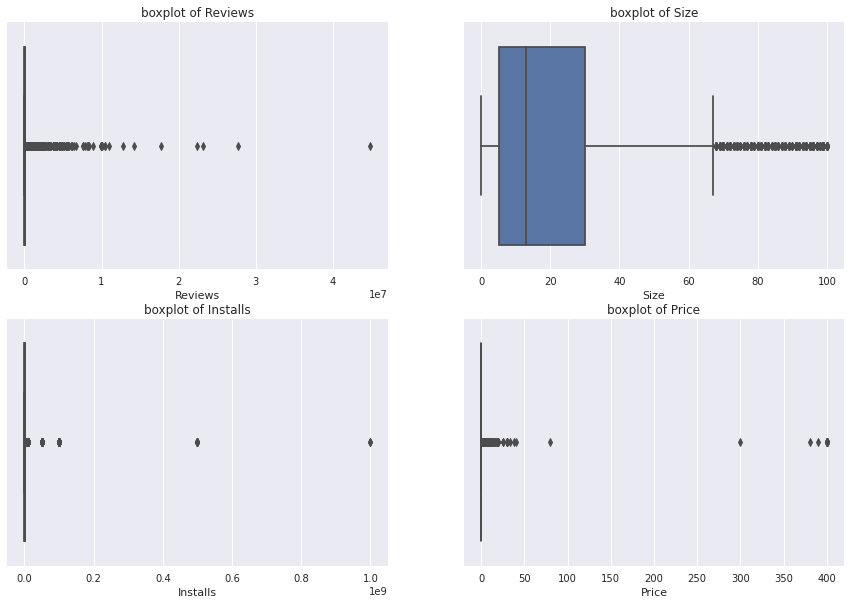

In [ ]:
figure, ax = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15,10)

sns.boxplot(train['Reviews'], ax=ax[0][0])
ax[0][0].set(title="boxplot of Reviews")

sns.boxplot(train['Size'], ax=ax[0][1])
ax[0][1].set(title="boxplot of Size")

sns.boxplot(train['Installs'], ax=ax[1][0])
ax[1][0].set(title="boxplot of Installs")

sns.boxplot(train['Price'], ax=ax[1][1])
ax[1][1].set(title="boxplot of Price")

전체적으로 이상치가 많은 것으로 보이지만

매우 많은 리뷰 수, 매우 많은 설치 수, 매우 비싼 가격, 매우 큰 앱의 크기 모두 살제로 존재하기 때문에 이상치라 판단하지 않고 이상치 자체도 데이터의 특성을 나타낼 수 있다고 생각하여 따로 제거 등의 방식은 하지 않을 예정이다.

하지만 스케일링을 필요하다고 생각하여 추후에 모델링을 할때 스케일링 작업을 진행하여 가장 좋은 스케일링 방법을 찾을 예정이다.

[Text(0.5, 1.0, 'Rating  VS Price')]

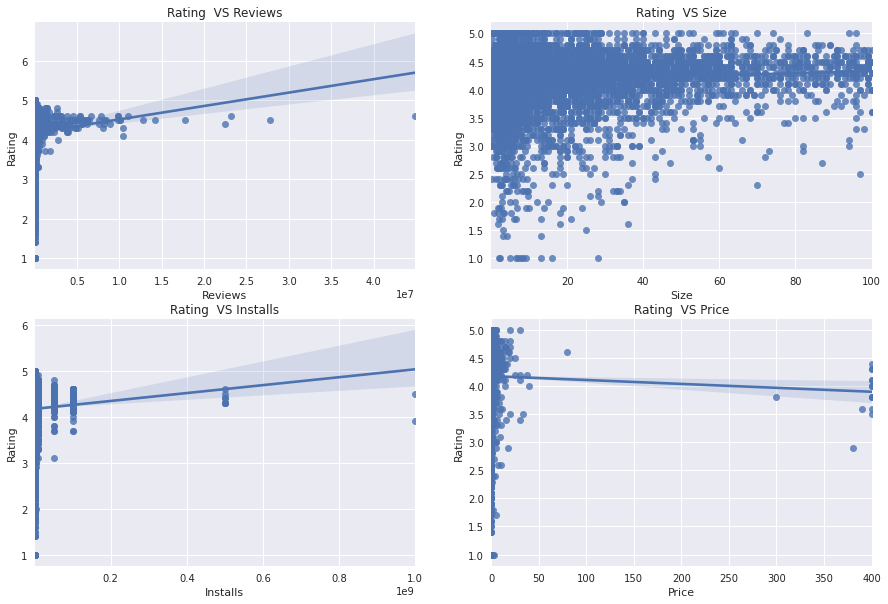

In [ ]:
figure, ax = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15,10)

sns.regplot(x="Reviews", y="Rating",data = train, ax = ax[0][0])
ax[0][0].set(title="Rating  VS Reviews")

sns.regplot(x="Size", y="Rating",data = train, ax = ax[0][1])
ax[0][1].set(title="Rating  VS Size")

sns.regplot(x="Installs", y="Rating",data = train, ax = ax[1][0])
ax[1][0].set(title="Rating  VS Installs")

sns.regplot(x="Price", y="Rating",data = train, ax = ax[1][1])
ax[1][1].set(title="Rating  VS Price")

리뷰의 경우 리뷰 수가 많으면 평점도 높아지는 경향을 보이는데 이는 가능하다고 생각된다. 왜냐하면 자기가 만족한 앱일 수록 리뷰를 많이 달기 때문이다.

설치의 경우 설치 수가 많을 수록 평점도 높아지는 경향을 보이는데 이는 가능하다고 생각된다. 왜냐하면 인기있는 앱일 수록 설치 수 또한 매우 높아지기 때문이다.

앱의 크기가 클 수록 평점도 높아지는 경향을 보이는데 이는 먼가 말이 안된다고 생각한다. 앱의 크기는 앱의 장르와 큰 연관이 있다고 생각되며 크기 자체가 평점과 큰 연관이 있다고 생각되지 않기 때문에 사용하지 않을 것이고 실제로 모델에서도 SIze를 제거했을 때 더 높은 성능을 보인다.

앱의 가격이 비쌀 수록 평점이 낮아지는 경향을 보이는데 너무 비싼 가격은 앱의 평점에 약영향을 줄 수 있지만 자신이 소비할 수 있을 수준의 가격은 개인적으로 평점에 영향을 주지 않는다고 생각한다. 따라서 Price 칼럼은 새롭게 범주화 시킬 예정이면 사용하지 않을 것이다. 또한 실제로 모델에서도 Price를 제거했을 때 더 높은 성능을 보인다.

### Reviews 와 Installs

리뷰와 설치수는 큰 연관이 있다고 생각된다. 기본적으로 우리가 설치를 했다고 해서 무조건 리뷰를 다는 것은 아니기 때문에 설치율 대비 리뷰 수 또한 평점에 영향을 줄 수 도 있다고 생각하여 새롭게 설치율을 분모로 하고 리뷰를 분자로 한 설치율 대비 리뷰를 나타내는 Review to Installs Rate 칼럼을 새롭게 만들 예정이다. 

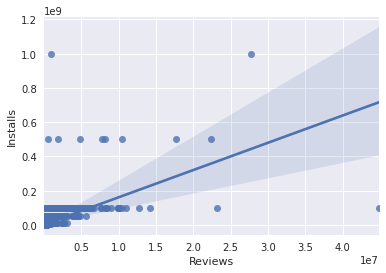

In [ ]:
sns.regplot(x="Reviews", y="Installs",data = train)

In [ ]:
train['Review to Installs Rate'] = train['Reviews'] / train['Installs']
test['Review to Installs Rate'] = test['Reviews'] / test['Installs']

Text(0.5, 1.0, 'Rating  VS Review to Installs Rate')

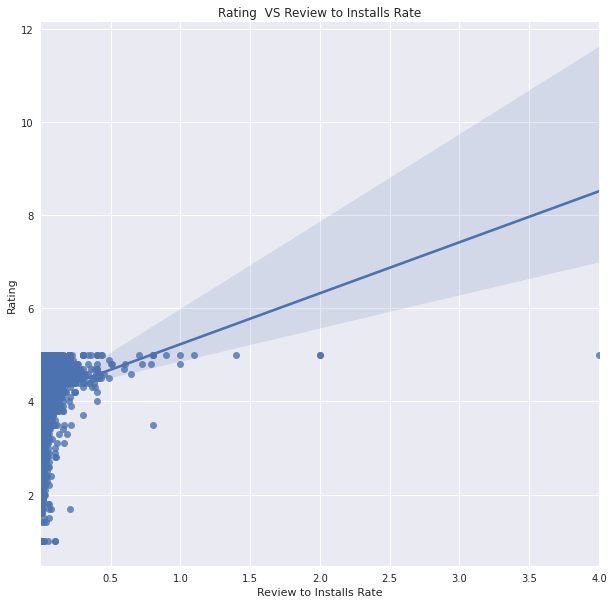

In [ ]:
plt.figure(figsize = (10,10))
sns.regplot(x="Review to Installs Rate", y="Rating",data = train)
plt.title('Rating  VS Review to Installs Rate')

실제 설치율 대비 리뷰수가 많을 수록 평점이 높아지는 경향을 보인다.

### Price

자신이 감당할 수 있을 만큼의 앱의 가격을 나타내고자 밑의 분석을 참고하여 앱의 가격을 범주화 사켰다.

https://www.kaggle.com/tanetboss/how-to-get-high-rating-on-play-store 참고

In [ ]:
def get_PriceBand(x):
  if x == 0 : return 0
  elif x <= 1 : return 1
  elif x <= 3 : return 2
  elif x <= 5 : return 3
  elif x <= 15 : return 4
  elif x <= 30 : return 5
  else: return 6

train['PriceBand'] = train['Price'].apply(get_PriceBand)
test['PriceBand'] = test['Price'].apply(get_PriceBand)

Text(0.5, 1.0, 'Rating VS PriceBand')

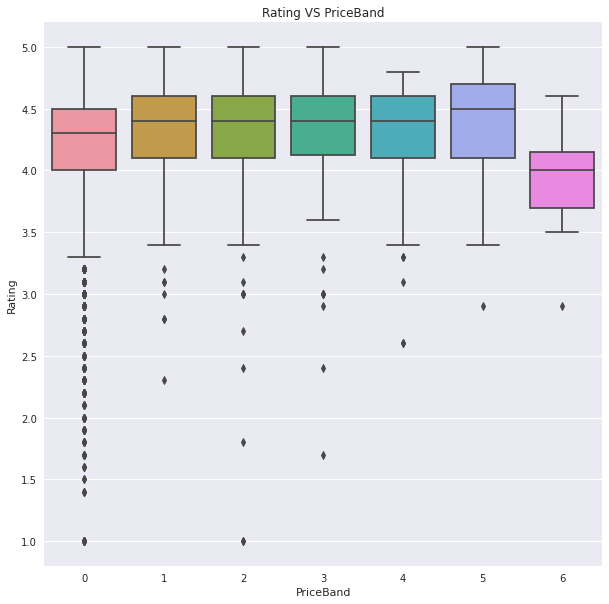

In [ ]:
plt.figure(figsize = (10,10))
sns.boxplot(x="PriceBand", y="Rating",data = train)
plt.title('Rating VS PriceBand')

실제로 매우 비싼 가격의 앱을 제외하고는 적정 수준의 가격은 크게 평점을 감소시키는 것이 아닌 더 높일 수도 있다는 것을 알 수 있다.

# 모델 학습 및 평가

최종적으로 사용한 칼럼은 
- App의 길이를 나타내는 App_len
- App의 이름에 특성을 나타내는 특정 빈도수 이상의 단어 칼럼들
- Category
- Reviews	
- Installs
- 모든 Genres를 활용하기 위한 원핫인코딩을 통한 Genres의 특성을 나타내는 칼럼들
- Last Updated Numeric
- Review to Installs Rate
- PriceBand

들 이다.

In [ ]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
# 속도 체크
from tqdm import tqdm_notebook

target = 'Rating'
drop_col_train = ['App','Clean_App', 'Genres', 'Last Updated', 'Id', 'Last Updated year', 'Last Updated month', 'Last Updated day', 'Genres_count', 'Type', 'Content Rating', 'Price', 'Size', 'Rating', 'cat_Rating']
drop_col_test = ['App','Clean_App', 'Genres', 'Last Updated', 'Id', 'Last Updated year', 'Last Updated month', 'Last Updated day', 'Genres_count', 'Type', 'Content Rating', 'Price', 'Size']

# 원본데이터의 변형을 막고자 데이터를 copy함
temp_train = train.copy()
temp_test = test.copy()

lbl = LabelEncoder()

# Implement Label Encoding 
cat_cols =  ['Category', 'Content Rating', 'Genres', 'New Content Rating']
for col in tqdm_notebook( cat_cols ):
    # local_train과 local_test를 concat하여 temp_df에 저장
    temp_df = pd.concat([ temp_train[[col]], temp_test[[col]] ] , axis=0)
    
    # Label-Encoding을 fitting함
    lbl.fit( temp_df[col] )
    
    # local_train/local_test에 label_encoding한 값을 대입함
    temp_train[col] = lbl.transform(temp_train[col])
    temp_test[col] = lbl.transform(temp_test[col])

X_train = temp_train.drop(labels=drop_col_train, axis=1)
y_train = temp_train[target]

X_test = temp_test.drop(labels=drop_col_test, axis=1)

In [ ]:
X_train.head()

,Category,Reviews,Installs,App_len,android,app,calculator,camera,car,chat,dating,editor,english,free,game,go,hd,launcher,learn,live,manager,mobile,news,online,photo,pro,simulator,theme,tracker,video,New Content Rating,Art & Design,Pretend Play,Creativity,Auto & Vehicles,Beauty,Books & Reference,Business,Comics,Communication,Dating,Education,Action & Adventure,Brain Games,Entertainment,Music & Video,Events,Finance,Food & Drink,Health & Fitness,House & Home,Libraries & Demo,Lifestyle,Adventure,Arcade,Casual,Card,Strategy,Action,Puzzle,Sports,Word,Racing,Simulation,Board,Trivia,Role Playing,Educational,Music,Music & Audio,Video Players & Editors,Medical,Social,Shopping,Photography,Travel & Local,Tools,Personalization,Productivity,Parenting,Weather,News & Magazines,Maps & Navigation,Casino,Last Updated Numeric,Review to Installs Rate,PriceBand
0,0,159,10000.0,46,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-212,0.015900,0
1,0,967,500000.0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-204,0.001934,0
2,0,87510,5000000.0,50,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6,0.017502,0
3,0,215644,50000000.0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-60,0.004313,0
4,0,967,100000.0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-48,0.009670,0


In [ ]:
# 데이터 분할
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# 모델
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# 스케일링
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# 속도 체크
from tqdm import tqdm_notebook

# CV는 5로
n_split = 5

# 균등하게 니눌때 사용
skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22)
# 균등하지 나누지 않을 때 사용
kf = KFold(n_splits = n_split, shuffle=True, random_state=22)

rf = RandomForestRegressor(random_state=22)
lgbm = lgbm.LGBMRegressor(random_state=22, tree_method='gpu_hist', predictor='gpu_predictor')
xgb = xgb.XGBRegressor(random_state=22, tree_method='gpu_hist', predictor='gpu_predictor', objective = 'reg:squarederror')
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()

num_cols = ['Reviews', 'Installs']
transfor_states = ['로그 변환', '표준화', '정규화', '스케일링 X']

for transfor_state in tqdm_notebook(transfor_states):

  # train 데이터에 대한 예측 값이 저장될 배열
  rf_oof_train = np.zeros(y_train.shape)
  lgbm_oof_train = np.zeros(y_train.shape)
  xgb_oof_train = np.zeros(y_train.shape)
  lr_oof_train = np.zeros(y_train.shape)
  lasso_oof_train = np.zeros(y_train.shape)
  ridge_oof_train = np.zeros(y_train.shape)

  # test 데이터에 대한 예측 값이 저장될 배열
  rf_oof_test = np.zeros((X_test.shape[0], ))
  lgbm_oof_test = np.zeros((X_test.shape[0], ))
  xgb_oof_test = np.zeros((X_test.shape[0], ))
  lr_oof_test = np.zeros((X_test.shape[0], ))
  lasso_oof_test = np.zeros((X_test.shape[0], ))
  ridge_oof_test = np.zeros((X_test.shape[0], ))

  # oof 방식을 통한 예측
  for trn_idx, val_idx in skf.split(X_train, train['cat_Rating']):
    trn_data, trn_label = X_train.iloc[trn_idx], y_train.iloc[trn_idx]
    val_data, val_label = X_train.iloc[val_idx], y_train.iloc[val_idx]
    if transfor_state == '로그 변환':
      for num_col in num_cols:
        trn_data[num_col] = np.log1p(trn_data[num_col])
        val_data[num_col] = np.log1p(val_data[num_col])
    
    elif transfor_state == '표준화':
      scaler = StandardScaler()
      for num_col in num_cols:
        trn_data[num_col] = scaler.fit_transform(trn_data[num_col].values.reshape(-1,1))
        val_data[num_col] = scaler.transform(val_data[num_col].values.reshape(-1,1))
    
    elif transfor_state == '정규화': 
      scaler = MinMaxScaler()
      for num_col in num_cols:
        trn_data[num_col] = scaler.fit_transform(trn_data[num_col].values.reshape(-1,1))
        val_data[num_col] = scaler.transform(val_data[num_col].values.reshape(-1,1))

    # RandomForestRegressor
    rf.fit(trn_data, trn_label)
    rf_valid_pred = rf.predict(val_data)
    rf_oof_train[val_idx] = rf_valid_pred

    rf_test_pred = rf.predict(X_test)
    rf_oof_test += rf_test_pred / n_split

    # LGBMRegressor
    lgbm.fit(trn_data, trn_label)
    lgbm_valid_pred = lgbm.predict(val_data)
    lgbm_oof_train[val_idx] = lgbm_valid_pred

    lgbm_test_pred = lgbm.predict(X_test)
    lgbm_oof_test += lgbm_test_pred / n_split

    # XGBRegressor
    xgb.fit(trn_data, trn_label)
    xgb_valid_pred = xgb.predict(val_data)
    xgb_oof_train[val_idx] = xgb_valid_pred

    xgb_test_pred = xgb.predict(X_test)
    xgb_oof_test += xgb_test_pred / n_split

    # LinearRegression
    lr.fit(trn_data, trn_label)
    lr_valid_pred = lr.predict(val_data)
    lr_oof_train[val_idx] = lr_valid_pred

    lr_test_pred = lr.predict(X_test)
    lr_oof_test += lr_test_pred / n_split

    # Lasso
    lasso.fit(trn_data, trn_label)
    lasso_valid_pred = lasso.predict(val_data)
    lasso_oof_train[val_idx] = lasso_valid_pred

    lasso_test_pred = lasso.predict(X_test)
    lasso_oof_test += lasso_test_pred / n_split

    # Ridge
    ridge.fit(trn_data, trn_label)
    ridge_valid_pred = ridge.predict(val_data)
    ridge_oof_train[val_idx] = ridge_valid_pred

    ridge_test_pred = ridge.predict(X_test)
    ridge_oof_test += ridge_test_pred / n_split

  print('='*100)
  print(transfor_state)
  print("RandomForestRegressor :{} ".format( rmse(rf_oof_train, y_train) ))
  print("LGBMRegressor         :{} ".format( rmse(lgbm_oof_train, y_train) ))
  print("XGBRegressor          :{} ".format( rmse(xgb_oof_train, y_train) ))
  print("LinearRegression      :{} ".format( rmse(lr_oof_train, y_train) ))
  print("Lasso                 :{} ".format( rmse(lasso_oof_train, y_train) ))
  print("Ridge                 :{} ".format( rmse(ridge_oof_train, y_train) ))
  print('='*100)

로그 변환
RandomForestRegressor :0.5031828918136632 
LGBMRegressor         :0.49292216067288014 
XGBRegressor          :0.48986003723957605 
LinearRegression      :0.49288175287326563 
Lasso                 :0.539108447709504 
Ridge                 :0.49275218122599185 
표준화
RandomForestRegressor :0.5034371277482839 
LGBMRegressor         :0.49389726599148337 
XGBRegressor          :0.48986003723957605 
LinearRegression      :0.5124264269650194 
Lasso                 :0.539108447709504 
Ridge                 :0.5124373861812196 
정규화
RandomForestRegressor :0.5040944825417754 
LGBMRegressor         :0.4929875528897468 
XGBRegressor          :0.48986003723957605 
LinearRegression      :0.5124264269650252 
Lasso                 :0.539108447709504 
Ridge                 :0.5124255612852497 
스케일링 X
RandomForestRegressor :0.5034137628896004 
LGBMRegressor         :0.4929237906544609 
XGBRegressor          :0.48986003723957605 
LinearRegression      :0.5124264269399652 
Lasso                 :0.538

In [ ]:
submission['Rating'] = np.clip(xgb_oof_test, a_min = 1, a_max = 5)
submission.to_csv('feature_engineering_xgb.csv', index=False)
submission.head()

,Id,Rating
0,5617,4.080293
1,5618,4.003086
2,5619,4.014165
3,5620,4.082640
4,5621,4.312093


In [ ]:
submission['Rating'] = np.clip(lgbm_oof_test, a_min = 1, a_max = 5)
submission.to_csv('feature_engineering_lgbm.csv', index=False)
submission.head()

,Id,Rating
0,5617,4.081879
1,5618,4.053410
2,5619,3.922573
3,5620,4.122426
4,5621,4.312947


(1.0, 5.0)

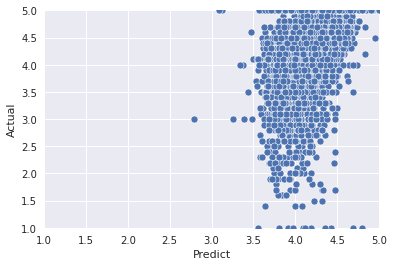

In [ ]:
df = pd.DataFrame(np.clip(xgb_oof_train, a_min = 1, a_max = 5), columns=['Predict'])
df['Actual'] = y_train

sns.scatterplot(df['Predict'], df['Actual'])
plt.ylim([1, 5])
plt.xlim([1, 5])

BaseLine Model의 성능

- RandomForestRegressor :0.521362341548655 
- LGBMRegressor         :0.5076668764954844 
- XGBRegressor          :0.5064623387319311 
- LinearRegression      :0.5369831379842762 
- Lasso                 :0.5416696346990609 
- Ridge                 :0.5369828838416785 

feature engineering 후 모델의 성능
- RandomForestRegressor :0.5034137628896004 
- LGBMRegressor         :0.4929237906544609 
- XGBRegressor          :0.48986003723957605 
- LinearRegression      :0.5124264269399652 
- Lasso                 :0.538086050625147 
- Ridge                 :0.5124374503845935 

feature engineering 후 모델의 성능이 더 향상된 것을 알 수 있으며 스케일링을 하지 않았을 때 ensemble 모델의 성능이 더 좋다는 것을 알 수 있다. 그런데 역시 대부분의 평점이 4이상이기 때문에 4미만의 평점은 잘 맞추지 못한다는 것을 알 수 있다.

따라서 최종적으로 현재 모델에 적용한 칼럼들을 사용하고 수치형 변수의 스케일링은 진행하지 않을 것이고 ensemble 모델의 하이퍼 파라미터 튜닝을 통해서 성능을 향상 시킨 후 최종 모델을 만들 예정이다.

# 하이퍼 파라미터 튜닝

하이퍼 파라미터 튜닝 자체도 괴적합을 유발할 수 있기 때문에 과적합 여부 판단을 위해 Train 데이터를 Train과 Test 데이터로 분리하겠다.

In [ ]:
from sklearn.model_selection import train_test_split

X_train_hyper, X_test_hyper, y_train_hyper, y_test_hyper = train_test_split(pd.concat([X_train, train['cat_Rating']], axis = 1), y_train, random_state = 22, test_size = 0.2, stratify = train['cat_Rating'], shuffle = True)

# 데이터를 학습시킬 때 데이터 분리의 기준
X_train_hyper_cat_Rating = X_train_hyper['cat_Rating']

X_train_hyper = X_train_hyper.drop('cat_Rating', axis=1)
X_test_hyper = X_test_hyper.drop('cat_Rating', axis=1)

In [ ]:
# 데이터 분할
from sklearn.model_selection import StratifiedKFold

# 모델
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm
import xgboost as xgb

# 속도 체크
from tqdm import tqdm_notebook

# CV는 5로
n_split = 5

# 균등하게 니눌때 사용
skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22)

# train 데이터에 대한 예측 값이 저장될 배열
rf_oof_train = np.zeros(y_train_hyper.shape)
lgbm_oof_train = np.zeros(y_train_hyper.shape)
xgb_oof_train = np.zeros(y_train_hyper.shape)

# test 데이터에 대한 예측 값이 저장될 배열
rf_oof_test = np.zeros(y_test_hyper.shape)
lgbm_oof_test = np.zeros(y_test_hyper.shape)
xgb_oof_test = np.zeros(y_test_hyper.shape)

rf = RandomForestRegressor(random_state=22)
lgbm = lgbm.LGBMRegressor(random_state=22, tree_method='gpu_hist', predictor='gpu_predictor')
xgb = xgb.XGBRegressor(random_state=22, tree_method='gpu_hist', predictor='gpu_predictor', objective = 'reg:squarederror')

# oof 방식을 통한 예측
for trn_idx, val_idx in tqdm_notebook(skf.split(X_train_hyper, X_train_hyper_cat_Rating)):
  trn_data, trn_label = X_train_hyper.iloc[trn_idx], y_train_hyper.iloc[trn_idx]
  val_data, val_label = X_train_hyper.iloc[val_idx], y_train_hyper.iloc[val_idx]

  # RandomForestRegressor
  rf.fit(trn_data, trn_label)
  rf_valid_pred = rf.predict(val_data)
  rf_oof_train[val_idx] = rf_valid_pred

  rf_test_pred = rf.predict(X_test_hyper)
  rf_oof_test += rf_test_pred / n_split

  # LGBMRegressor
  lgbm.fit(trn_data, trn_label)
  lgbm_valid_pred = lgbm.predict(val_data)
  lgbm_oof_train[val_idx] = lgbm_valid_pred

  lgbm_test_pred = lgbm.predict(X_test_hyper)
  lgbm_oof_test += lgbm_test_pred / n_split

  # XGBRegressor
  xgb.fit(trn_data, trn_label)
  xgb_valid_pred = xgb.predict(val_data)
  xgb_oof_train[val_idx] = xgb_valid_pred

  xgb_test_pred = xgb.predict(X_test_hyper)
  xgb_oof_test += xgb_test_pred / n_split

In [ ]:
print('Train-Set')
print("RandomForestRegressor :{} ".format( rmse(rf_oof_train, y_train_hyper) ))
print("LGBMRegressor         :{} ".format( rmse(lgbm_oof_train, y_train_hyper) ))
print("XGBRegressor          :{} ".format( rmse(xgb_oof_train, y_train_hyper) ))

print()

print('Test-Set')
print("RandomForestRegressor :{} ".format( rmse(rf_oof_test, y_test_hyper) ))
print("LGBMRegressor         :{} ".format( rmse(lgbm_oof_test, y_test_hyper) ))
print("XGBRegressor          :{} ".format( rmse(xgb_oof_test, y_test_hyper) ))

Train-Set
RandomForestRegressor :0.5058319271827705 
LGBMRegressor         :0.5019378454067902 
XGBRegressor          :0.4917741043653219 

Test-Set
RandomForestRegressor :0.49339174026267413 
LGBMRegressor         :0.4871663024170303 
XGBRegressor          :0.4911703393877257 


위 값이 하이퍼 파라미터 튜닝의 기준이다.

## RandomForestRegressor

In [ ]:
# # 데이터 분할
# from sklearn.model_selection import StratifiedKFold

# # 모델
# from sklearn.ensemble import RandomForestRegressor

# # 속도 체크
# from tqdm import tqdm_notebook

# # 반복 수
# num_epoch = 100

# # CV는 5로
# n_split = 5

# # 균등하게 니눌때 사용
# skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22)

# # hyperparameter 탐색 결과를 리스트로 저장합니다.
# coarse_hyperparameters_list = []

# for epoch in tqdm_notebook(range(num_epoch)):
#   # 트리의 깊이를 나타냄
#   max_depth = np.random.randint(low=2, high=100)

#   # 1에 가까울수록 전체 픽쳐를 다 사용함
#   max_features = np.random.uniform(low=0.5, high=1)

#   # 말단 노드가 되기위한 최소한의 샘플 데이터 수
#   min_samples_leaf = np.random.randint(low=2, high=50)

#   # 노드를 분활하기 위한 최소한의 샘플 데이터 수
#   min_samples_split = np.random.randint(low=2, high=50)

#   # train 데이터에 대한 예측 값이 저장될 배열
#   rf_oof_train = np.zeros(y_train_hyper.shape)

#   # test 데이터에 대한 예측 값이 저장될 배열
#   rf_oof_test = np.zeros(y_test_hyper.shape)

#   rf = RandomForestRegressor(random_state=22,
#                              max_depth = max_depth,
#                              max_features = max_features,
#                              min_samples_leaf = min_samples_leaf,
#                              min_samples_split = min_samples_split)

#   # oof 방식을 통한 예측
#   for trn_idx, val_idx in skf.split(X_train_hyper, X_train_hyper_cat_Rating):
#     trn_data, trn_label = X_train_hyper.iloc[trn_idx], y_train_hyper.iloc[trn_idx]
#     val_data, val_label = X_train_hyper.iloc[val_idx], y_train_hyper.iloc[val_idx]

#     # RandomForestRegressor
#     rf.fit(trn_data, trn_label)
#     rf_valid_pred = rf.predict(val_data)
#     rf_oof_train[val_idx] = rf_valid_pred

#     rf_test_pred = rf.predict(X_test_hyper)
#     rf_oof_test += rf_test_pred / n_split

#   train_score = rmse(rf_oof_train, y_train_hyper)
#   test_score = rmse(rf_oof_test, y_test_hyper)

#   hyperparameters = {
#       'epoch': epoch,
#       'train_score': train_score,
#       'test_score' : test_score,
#       'min_samples_leaf': min_samples_leaf,
#       'max_depth': max_depth,
#       'max_features': max_features,
#       'min_samples_split': min_samples_split
#   }

#   coarse_hyperparameters_list.append(hyperparameters)

#   print(f"{epoch:2} min_samples_leaf = {min_samples_leaf}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, min_samples_split = {min_samples_split},  train_score = {train_score:.5f}, test_score = {test_score:.5f}")

# coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

In [ ]:
# coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="train_score")
# coarse_hyperparameters_list.head(10)

In [ ]:
# coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="test_score")
# coarse_hyperparameters_list.head(10)

In [ ]:
# 데이터 분할
from sklearn.model_selection import StratifiedKFold

# 모델
import lightgbm as lgbm

# 속도 체크
from tqdm import tqdm_notebook

# CV는 5로
n_split = 5

# 균등하게 니눌때 사용
skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22)

# 분류기의 수
n_estimators = 300

# 트리의 깊이를 나타냄
max_depth = 63

# 1에 가까울수록 전체 픽쳐를 다 사용함
max_features = 0.805012

# 말단 노드가 되기위한 최소한의 샘플 데이터 수
min_samples_leaf = 4

# 노드를 분활하기 위한 최소한의 샘플 데이터 수
min_samples_split = 40

# train 데이터에 대한 예측 값이 저장될 배열
rf_oof_train = np.zeros(y_train_hyper.shape)

# test 데이터에 대한 예측 값이 저장될 배열
rf_oof_test = np.zeros(y_test_hyper.shape)

rf = RandomForestRegressor(random_state=22,
                            max_depth = max_depth,
                            max_features = max_features,
                            min_samples_leaf = min_samples_leaf,
                            min_samples_split = min_samples_split,
                            n_estimators = n_estimators)

# oof 방식을 통한 예측
for trn_idx, val_idx in tqdm_notebook(skf.split(X_train_hyper, X_train_hyper_cat_Rating)):
  trn_data, trn_label = X_train_hyper.iloc[trn_idx], y_train_hyper.iloc[trn_idx]
  val_data, val_label = X_train_hyper.iloc[val_idx], y_train_hyper.iloc[val_idx]

  # RandomForestRegressor
  rf.fit(trn_data, trn_label)
  rf_valid_pred = rf.predict(val_data)
  rf_oof_train[val_idx] = rf_valid_pred

  rf_test_pred = rf.predict(X_test_hyper)
  rf_oof_test += rf_test_pred / n_split

print('Train-Set')
print("RandomForestRegressor         :{} ".format( rmse(rf_oof_train, y_train_hyper) ))
print('Test-Set')
print("RandomForestRegressor         :{} ".format( rmse(rf_oof_test, y_test_hyper) ))


Train-Set
RandomForestRegressor         :0.4923770458258842 
Test-Set
RandomForestRegressor         :0.4905839680276873 


## LGBMRegressor

1. max_depth, min_child_weight, subsample, colsample_bytree 튜닝
2. learning_rate 튜닝

In [ ]:
# # 데이터 분할
# from sklearn.model_selection import StratifiedKFold

# # 모델
# import lightgbm as lgbm

# # 속도 체크
# from tqdm import tqdm_notebook

# # CV는 5로
# n_split = 5

# # 균등하게 니눌때 사용
# skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22)

# max_depths = [4, 5, 6, 7, 8]

# min_child_weights = [1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9, 10]

# subsamples = [0.5, 0.6, 0.7, 0.8, 0.9] 

# colsample_bytrees = [0.5, 0.6, 0.7, 0.8, 0.9] 

# # hyperparameter 탐색 결과를 리스트로 저장합니다.
# coarse_hyperparameters_list = []

# for max_depth in tqdm_notebook(max_depths):
#   for min_child_weight in min_child_weights:
#     for subsample in subsamples:
#       for colsample_bytree in colsample_bytrees:

#         # train 데이터에 대한 예측 값이 저장될 배열
#         lgbm_oof_train = np.zeros(y_train_hyper.shape)
#         # test 데이터에 대한 예측 값이 저장될 배열
#         lgbm_oof_test = np.zeros(y_test_hyper.shape)

#         model = lgbm.LGBMRegressor(random_state=22, 
#                                   tree_method='gpu_hist', 
#                                   predictor='gpu_predictor',
#                                   max_depth = max_depth,
#                                   min_child_weight = min_child_weight,
#                                   subsample = subsample,
#                                   colsample_bytree = colsample_bytree)
        
#         # oof 방식을 통한 예측
#         for trn_idx, val_idx in skf.split(X_train_hyper, X_train_hyper_cat_Rating):
#           trn_data, trn_label = X_train_hyper.iloc[trn_idx], y_train_hyper.iloc[trn_idx]
#           val_data, val_label = X_train_hyper.iloc[val_idx], y_train_hyper.iloc[val_idx]

#           # LGBMRegressor
#           model.fit(trn_data, trn_label)
#           lgbm_valid_pred = model.predict(val_data)
#           lgbm_oof_train[val_idx] = lgbm_valid_pred

#           lgbm_test_pred = model.predict(X_test_hyper)
#           lgbm_oof_test += lgbm_test_pred / n_split

#         train_score = rmse(lgbm_oof_train, y_train_hyper)
#         test_score = rmse(lgbm_oof_test, y_test_hyper)

#         hyperparameters = {
#             'train_score': train_score,
#             'test_score' : test_score,
#             'max_depth': max_depth,
#             'min_child_weight': min_child_weight,
#             'subsample': subsample,
#             'colsample_bytree': colsample_bytree
#           }

#         coarse_hyperparameters_list.append(hyperparameters)

#         print(f"max_depth = {max_depth}, min_child_weight = {min_child_weight}, subsample = {subsample}, colsample_bytree = {colsample_bytree},  train_score = {train_score:.5f}, test_score = {test_score:.5f}")

# coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

In [ ]:
# coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="train_score")
# coarse_hyperparameters_list.head(10)

In [ ]:
# coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="test_score")
# coarse_hyperparameters_list.head(10)

In [ ]:
# 데이터 분할
from sklearn.model_selection import StratifiedKFold

# 모델
import lightgbm as lgbm

# 속도 체크
from tqdm import tqdm_notebook

# CV는 5로
n_split = 5

# 균등하게 니눌때 사용
skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22)

# train 데이터에 대한 예측 값이 저장될 배열
lgbm_oof_train = np.zeros(y_train_hyper.shape)

# test 데이터에 대한 예측 값이 저장될 배열
lgbm_oof_test = np.zeros(y_test_hyper.shape)

# 분류기의 수
n_estimators = 300

# Tree 깊이 수
max_depth = 4

# min_child_weight를 기준으로 추가 분기 결정(크면 Underfitting)
min_child_weight = 6

# 데이터 중 샘플링(0.5 - 1)
subsample = 0.7

# column 중 sampling(0.5 - 1)
colsample_bytree = 0.5

lgbm = lgbm.LGBMRegressor(random_state=22, 
                          tree_method='gpu_hist', 
                          predictor='gpu_predictor',
                          max_depth = max_depth,
                          min_child_weight = min_child_weight,
                          subsample = subsample,
                          colsample_bytree = colsample_bytree,
                          n_estimators = n_estimators)

# oof 방식을 통한 예측
for trn_idx, val_idx in tqdm_notebook(skf.split(X_train_hyper, X_train_hyper_cat_Rating)):
  trn_data, trn_label = X_train_hyper.iloc[trn_idx], y_train_hyper.iloc[trn_idx]
  val_data, val_label = X_train_hyper.iloc[val_idx], y_train_hyper.iloc[val_idx]

  # LGBMRegressor
  lgbm.fit(trn_data, trn_label)
  lgbm_valid_pred = lgbm.predict(val_data)
  lgbm_oof_train[val_idx] = lgbm_valid_pred

  lgbm_test_pred = lgbm.predict(X_test_hyper)
  lgbm_oof_test += lgbm_test_pred / n_split

print('Train-Set')
print("LGBMRegressor         :{} ".format( rmse(lgbm_oof_train, y_train_hyper) ))
print('Test-Set')
print("LGBMRegressor         :{} ".format( rmse(lgbm_oof_test, y_test_hyper) ))


Train-Set
LGBMRegressor         :0.4955700829798112 
Test-Set
LGBMRegressor         :0.48583189897825246 


## XGBRegressor

1. max_depth, min_child_weight, subsample, colsample_bytree 튜닝
2. gamma 튜닝
3. learning_rate 튜닝

In [ ]:
# # 데이터 분할
# from sklearn.model_selection import StratifiedKFold

# # 모델
# import xgboost as xgb

# # 속도 체크
# from tqdm import tqdm_notebook

# # CV는 5로
# n_split = 5

# # 균등하게 니눌때 사용
# skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22)

# max_depths = [4, 5, 6, 7, 8]

# min_child_weights = [1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9, 10]

# subsamples = [0.5, 0.6, 0.7, 0.8, 0.9] 

# colsample_bytrees = [0.5, 0.6, 0.7, 0.8, 0.9] 

# # hyperparameter 탐색 결과를 리스트로 저장합니다.
# coarse_hyperparameters_list = []

# for max_depth in tqdm_notebook(max_depths):
#   for min_child_weight in min_child_weights:
#     for subsample in subsamples:
#       for colsample_bytree in colsample_bytrees:

#         # train 데이터에 대한 예측 값이 저장될 배열
#         xgb_oof_train = np.zeros(y_train_hyper.shape)
#         # test 데이터에 대한 예측 값이 저장될 배열
#         xgb_oof_test = np.zeros(y_test_hyper.shape)

#         model = xgb.XGBRegressor(random_state=22, 
#                                   tree_method='gpu_hist', 
#                                   predictor='gpu_predictor',
#                                   objective = 'reg:squarederror',
#                                   max_depth = max_depth,
#                                   min_child_weight = min_child_weight,
#                                   subsample = subsample,
#                                   colsample_bytree = colsample_bytree,
#                                   gamma = 0.1)
        
#         # oof 방식을 통한 예측
#         for trn_idx, val_idx in skf.split(X_train_hyper, X_train_hyper_cat_Rating):
#           trn_data, trn_label = X_train_hyper.iloc[trn_idx], y_train_hyper.iloc[trn_idx]
#           val_data, val_label = X_train_hyper.iloc[val_idx], y_train_hyper.iloc[val_idx]

#           # XGBRegressor
#           model.fit(trn_data, trn_label)
#           xgb_valid_pred = model.predict(val_data)
#           xgb_oof_train[val_idx] = xgb_valid_pred

#           xgb_test_pred = model.predict(X_test_hyper)
#           xgb_oof_test += xgb_test_pred / n_split

#         train_score = rmse(xgb_oof_train, y_train_hyper)
#         test_score = rmse(xgb_oof_test, y_test_hyper)

#         hyperparameters = {
#             'train_score': train_score,
#             'test_score' : test_score,
#             'max_depth': max_depth,
#             'min_child_weight': min_child_weight,
#             'subsample': subsample,
#             'colsample_bytree': colsample_bytree
#           }

#         coarse_hyperparameters_list.append(hyperparameters)

#         print(f"max_depth = {max_depth}, min_child_weight = {min_child_weight}, subsample = {subsample}, colsample_bytree = {colsample_bytree},  train_score = {train_score:.5f}, test_score = {test_score:.5f}")

# coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

In [ ]:
# coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="train_score")
# coarse_hyperparameters_list.head(10)

In [ ]:
# coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="test_score")
# coarse_hyperparameters_list.head(10)

In [ ]:
# 데이터 분할
from sklearn.model_selection import StratifiedKFold

# 모델
import xgboost as xgb

# 속도 체크
from tqdm import tqdm_notebook

# CV는 5로
n_split = 5

# 균등하게 니눌때 사용
skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22)

# train 데이터에 대한 예측 값이 저장될 배열
xgb_oof_train = np.zeros(y_train_hyper.shape)

# test 데이터에 대한 예측 값이 저장될 배열
xgb_oof_test = np.zeros(y_test_hyper.shape)

# column 중 sampling(0.5 - 1)
colsample_bytree = 0.6

# 각 level마다 샘플링 비율
colsample_bylevel = 0.7

# 분류기의 수
n_estimators = 150

xgb = xgb.XGBRegressor(random_state=22, 
                       tree_method='gpu_hist', 
                       predictor='gpu_predictor', 
                       objective = 'reg:squarederror',
                       colsample_bylevel = colsample_bylevel,
                       colsample_bytree = colsample_bytree,
                       n_estimators = n_estimators)

# oof 방식을 통한 예측
for trn_idx, val_idx in tqdm_notebook(skf.split(X_train_hyper, X_train_hyper_cat_Rating)):
  trn_data, trn_label = X_train_hyper.iloc[trn_idx], y_train_hyper.iloc[trn_idx]
  val_data, val_label = X_train_hyper.iloc[val_idx], y_train_hyper.iloc[val_idx]

  # XGBRegressor
  xgb.fit(trn_data, trn_label)
  xgb_valid_pred = xgb.predict(val_data)
  xgb_oof_train[val_idx] = xgb_valid_pred

  xgb_test_pred = xgb.predict(X_test_hyper)
  xgb_oof_test += xgb_test_pred / n_split

print('Train-Set')
print("XGBRegressor          :{} ".format( rmse(xgb_oof_train, y_train_hyper) ))
print('Test-Set')
print("XGBRegressor          :{} ".format( rmse(xgb_oof_test, y_test_hyper) ))


Train-Set
XGBRegressor          :0.49054566305913244 
Test-Set
XGBRegressor          :0.4896597861850817 


XGBRegressor의 경우 파라미터의 건드는 경우 성능이 더 안좋아지는 경향을 보이며
최적의 하이퍼 파라미터로 예측을 진행시 기본 모델 보다 더 성능이 더 하락되는 모습을 보인다.

따라서 하이퍼파리머튜닝된 모델이 아닌 기본 모델을 예측에 활용할 것이다.

원래 하이퍼 파라미터 튜닝 자체가 극적인 성능 향상을 가져오는 것은 아니기 때문에 이러한 경우도 발생할 수 있으며 타겟 값 자체가 4 ~ 5 에 밀집되어 있어서 XGBRegressor의 경우 파라미터를 건드지 않는 것이 더 좋을 수도 있다.

# 스택킹

전체 차원에 대한 평균을 구하는 모델인 LinearRegression(가장 단순하면서도 강력한 모델)을 메타 모델로 활용할 것이다.

In [ ]:
cols = ['RandomForestRegressor', 'LGBMRegressor', 'XGBRegressor']
stacking_train = pd.DataFrame(np.concatenate([rf_oof_train.reshape(-1,1), lgbm_oof_train.reshape(-1,1), xgb_oof_train.reshape(-1,1)], axis=1), columns= cols)
stacking_test = pd.DataFrame(np.concatenate([rf_oof_test.reshape(-1,1), lgbm_oof_test.reshape(-1,1), xgb_oof_test.reshape(-1,1)], axis=1), columns= cols)

In [ ]:
# 데이터 분할
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# LinearRegression
lr.fit(stacking_train, y_train_hyper)
lr_train_pred = lr.predict(stacking_train)
lr_test_pred = lr.predict(stacking_test)

print('Train-Set')
print("LinearRegression          :{} ".format( rmse(lr_train_pred, y_train_hyper) ))

print('Test-Set')
print("LinearRegression          :{} ".format( rmse(lr_test_pred, y_test_hyper) ))

Train-Set
LinearRegression          :0.48862293845176735 
Test-Set
LinearRegression          :0.4867681520398412 


# 최종 예측

## 개별모델

In [ ]:
X_train.head()

,Category,Reviews,Installs,App_len,android,app,calculator,camera,car,chat,dating,editor,english,free,game,go,hd,launcher,learn,live,manager,mobile,news,online,photo,pro,simulator,theme,tracker,video,New Content Rating,Art & Design,Pretend Play,Creativity,Auto & Vehicles,Beauty,Books & Reference,Business,Comics,Communication,Dating,Education,Action & Adventure,Brain Games,Entertainment,Music & Video,Events,Finance,Food & Drink,Health & Fitness,House & Home,Libraries & Demo,Lifestyle,Adventure,Arcade,Casual,Card,Strategy,Action,Puzzle,Sports,Word,Racing,Simulation,Board,Trivia,Role Playing,Educational,Music,Music & Audio,Video Players & Editors,Medical,Social,Shopping,Photography,Travel & Local,Tools,Personalization,Productivity,Parenting,Weather,News & Magazines,Maps & Navigation,Casino,Last Updated Numeric,Review to Installs Rate,PriceBand
0,0,159,10000.0,46,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-212,0.015900,0
1,0,967,500000.0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-204,0.001934,0
2,0,87510,5000000.0,50,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6,0.017502,0
3,0,215644,50000000.0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-60,0.004313,0
4,0,967,100000.0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-48,0.009670,0


In [ ]:
X_test.head()

,Category,Reviews,Installs,App_len,android,app,calculator,camera,car,chat,dating,editor,english,free,game,go,hd,launcher,learn,live,manager,mobile,news,online,photo,pro,simulator,theme,tracker,video,New Content Rating,Art & Design,Pretend Play,Creativity,Auto & Vehicles,Beauty,Books & Reference,Business,Comics,Communication,Dating,Education,Action & Adventure,Brain Games,Entertainment,Music & Video,Events,Finance,Food & Drink,Health & Fitness,House & Home,Libraries & Demo,Lifestyle,Adventure,Arcade,Casual,Card,Strategy,Action,Puzzle,Sports,Word,Racing,Simulation,Board,Trivia,Role Playing,Educational,Music,Music & Audio,Video Players & Editors,Medical,Social,Shopping,Photography,Travel & Local,Tools,Personalization,Productivity,Parenting,Weather,News & Magazines,Maps & Navigation,Casino,Last Updated Numeric,Review to Installs Rate,PriceBand
0,25,1205,100000.0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-58,0.01205,0
1,11,267,10000.0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-517,0.02670,0
2,14,183,10000.0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-54,0.01830,0
3,15,76,1000.0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1289,0.07600,3
4,11,429,10000.0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-162,0.04290,3


In [ ]:
# 데이터 분할
from sklearn.model_selection import StratifiedKFold

# 모델
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm
import xgboost as xgb

# 속도 체크
from tqdm import tqdm_notebook

# CV는 5로
n_split = 5

# 균등하게 니눌때 사용
skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22)

# train 데이터에 대한 예측 값이 저장될 배열
rf_oof_train = np.zeros(y_train.shape)
lgbm_oof_train = np.zeros(y_train.shape)
xgb_oof_train = np.zeros(y_train.shape)

# test 데이터에 대한 예측 값이 저장될 배열
rf_oof_test = np.zeros((X_test.shape[0], ))
lgbm_oof_test = np.zeros((X_test.shape[0], ))
xgb_oof_test = np.zeros((X_test.shape[0], ))

rf = RandomForestRegressor(random_state = 22,
                            n_estimators = 300,
                            max_depth = 63,
                            max_features = 0.805012,
                            min_samples_leaf = 4,
                            min_samples_split = 40)

lgbm = lgbm.LGBMRegressor(random_state = 22, 
                          tree_method = 'gpu_hist', 
                          predictor = 'gpu_predictor',
                          n_estimators = 300,
                          max_depth = 4,
                          min_child_weight = 6,
                          subsample = 0.7,
                          colsample_bytree = 0.5)

xgb = xgb.XGBRegressor(random_state = 22, 
                       tree_method = 'gpu_hist', 
                       predictor = 'gpu_predictor', 
                       objective = 'reg:squarederror')

# oof 방식을 통한 예측
for trn_idx, val_idx in tqdm_notebook(skf.split(X_train, train['cat_Rating'])):
  trn_data, trn_label = X_train.iloc[trn_idx], y_train.iloc[trn_idx]
  val_data, val_label = X_train.iloc[val_idx], y_train.iloc[val_idx]

  # RandomForestRegressor
  rf.fit(trn_data, trn_label)
  rf_valid_pred = rf.predict(val_data)
  rf_oof_train[val_idx] = rf_valid_pred

  rf_test_pred = rf.predict(X_test)
  rf_oof_test += rf_test_pred / n_split

  # LGBMRegressor
  lgbm.fit(trn_data, trn_label)
  lgbm_valid_pred = lgbm.predict(val_data)
  lgbm_oof_train[val_idx] = lgbm_valid_pred

  lgbm_test_pred = lgbm.predict(X_test)
  lgbm_oof_test += lgbm_test_pred / n_split

  # XGBRegressor
  xgb.fit(trn_data, trn_label)
  xgb_valid_pred = xgb.predict(val_data)
  xgb_oof_train[val_idx] = xgb_valid_pred

  xgb_test_pred = xgb.predict(X_test)
  xgb_oof_test += xgb_test_pred / n_split

print("RandomForestRegressor :{} ".format( rmse(rf_oof_train, y_train) ))
print("LGBMRegressor         :{} ".format( rmse(lgbm_oof_train, y_train) ))
print("XGBRegressor          :{} ".format( rmse(xgb_oof_train, y_train) ))


RandomForestRegressor :0.4907127682882051 
LGBMRegressor         :0.48942088917798715 
XGBRegressor          :0.48986003723957605 


In [ ]:
submission['Rating'] = np.clip(rf_oof_test, a_min = 1, a_max = 5)
submission.to_csv('RandomForestRegressor.csv', index=False)
submission.head()

,Id,Rating
0,5617,4.039739
1,5618,4.029873
2,5619,4.072242
3,5620,4.264416
4,5621,4.158593


0.56911

In [ ]:
submission['Rating'] = np.clip(lgbm_oof_test, a_min = 1, a_max = 5)
submission.to_csv('LGBMRegressor.csv', index=False)
submission.head()

,Id,Rating
0,5617,4.072007
1,5618,3.963679
2,5619,3.945663
3,5620,3.834275
4,5621,4.354074


0.57433

In [ ]:
submission['Rating'] = np.clip(xgb_oof_test, a_min = 1, a_max = 5)
submission.to_csv('XGBRegressor.csv', index=False)
submission.head()

,Id,Rating
0,5617,4.080293
1,5618,4.003086
2,5619,4.014165
3,5620,4.082640
4,5621,4.312093


0.57289

## 스택킹

In [ ]:
cols = ['RandomForestRegressor', 'LGBMRegressor', 'XGBRegressor']
stacking_train = pd.DataFrame(np.concatenate([rf_oof_train.reshape(-1,1), lgbm_oof_train.reshape(-1,1), xgb_oof_train.reshape(-1,1)], axis=1), columns= cols)
stacking_test = pd.DataFrame(np.concatenate([rf_oof_test.reshape(-1,1), lgbm_oof_test.reshape(-1,1), xgb_oof_test.reshape(-1,1)], axis=1), columns= cols)

In [ ]:
# 데이터 분할
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# LinearRegression
lr.fit(stacking_train, y_train)
lr_train_pred = lr.predict(stacking_train)
lr_test_pred = lr.predict(stacking_test)

print("LinearRegression          :{} ".format( rmse(lr_train_pred, y_train) ))

LinearRegression          :0.4860495846811127 


In [ ]:
submission['Rating'] = np.clip(lr_test_pred, a_min = 1, a_max = 5)
submission.to_csv('Stacking.csv', index=False)
submission.head()

,Id,Rating
0,5617,4.066702
1,5618,3.995911
2,5619,4.003072
3,5620,4.027093
4,5621,4.285992


0.56987

# 결론

개별 모델
- RandomForestRegressor : 0.56911 -> 튜닝을 통한 극적인 성능 향상을 보임
- LGBMRegressor : 0.57433 -> 튜닝을 통해서 약간의 성능 향상을 보임
- XGBRegressor : 0.57289 -> 튜닝이 큰 도움이 되지 않으므로 기본 모델을 활용

스택킹
- LinearRegression : 0.56987 -> 스택킹이 무조건 모든 개별 모델 보다 높은 성능 향상을 보이는 것은 아니다.

RandomForestRegressor의 경우 하이퍼 파라미터 튜닝을 지속한다면 더 높은 성능 향상을 보일 수 있을 것이다. RandomForestRegressor의 경우 기본 파라미터 자체가 주어진 데이터에 잘 맞지 않았기 때문에 튜닝을 통해서 성능이 매우 향상된 것으로 판단된다.

Boosting 모델 자체가 데이터에 따라서는 하이퍼 파라미터 튜닝을 통한 극적인 성능 향상을 보이지는 않기 때문에 기본 모델로도 충분한 성능을 보일 수 있다. 왜냐하면 약분류기를 합치는 방식이므로 약분류기 자체를 튜닝하더라도 약분류기이기 때문에 무조건 성능이 높아지는 것은 아니다.

Stacking이 무조건 성능 향상을 보이는 것은 아니다. 왜냐하면 전문가의 집단지성이 무조건 한명의 완벽한 전문가를 이긴다는 보장은 없기 때문이다.